In [1]:
!pip install wandb

In [2]:
import wandb

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
wandb.init(
    project="IRIS-GAN",
)

wandb: Currently logged in as: krishachemburkar (kreeeeesha). Use `wandb login --relogin` to force relogin


In [6]:

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_0 = iris_df[iris_df['target']==0]

In [10]:
iris_0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal length (cm) norm,sepal width (cm) norm,petal length (cm) norm,petal width (cm) norm
0,5.1,3.5,1.4,0.2,0,0.269382,0.191870,-0.360636,-0.440924
1,4.9,3.0,1.4,0.2,0,-0.303771,-1.140559,-0.360636,-0.440924
2,4.7,3.2,1.3,0.2,0,-0.876924,-0.607588,-0.942306,-0.440924
3,4.6,3.1,1.5,0.2,0,-1.163501,-0.874073,0.221035,-0.440924
4,5.0,3.6,1.4,0.2,0,-0.017195,0.458355,-0.360636,-0.440924
5,5.4,3.9,1.7,0.4,0,1.129111,1.257813,1.384376,1.476136
6,4.6,3.4,1.4,0.3,0,-1.163501,-0.074616,-0.360636,0.517606
7,5.0,3.4,1.5,0.2,0,-0.017195,-0.074616,0.221035,-0.440924
8,4.4,2.9,1.4,0.2,0,-1.736653,-1.407045,-0.360636,-0.440924
9,4.9,3.1,1.5,0.1,0,-0.303771,-0.874073,0.221035,-1.399454


In [12]:
iris_0 = iris_0[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']]

In [13]:
iris_0_norm

,sepal length (cm) norm,sepal width (cm) norm,petal length (cm) norm,petal width (cm) norm,target
0,0.269382,0.191870,-0.360636,-0.440924,0
1,-0.303771,-1.140559,-0.360636,-0.440924,0
2,-0.876924,-0.607588,-0.942306,-0.440924,0
3,-1.163501,-0.874073,0.221035,-0.440924,0
4,-0.017195,0.458355,-0.360636,-0.440924,0
5,1.129111,1.257813,1.384376,1.476136,0
6,-1.163501,-0.074616,-0.360636,0.517606,0
7,-0.017195,-0.074616,0.221035,-0.440924,0
8,-1.736653,-1.407045,-0.360636,-0.440924,0
9,-0.303771,-0.874073,0.221035,-1.399454,0


In [14]:
import matplotlib.pyplot as plt

In [16]:
class Discriminator(nn.Module):
  def __init__(self, input_dim):
    super(Discriminator, self).__init__()
    self.container = nn.Sequential(
        nn.Linear(input_dim, 8),
        nn.LeakyReLU(),
        nn.Linear(8, 32),
        nn.LeakyReLU(),
        nn.Linear(32, 16),
        nn.LeakyReLU(),
        nn.Linear(16, 8),
        nn.LeakyReLU(),
        nn.Linear(8, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.container(x)

In [17]:
class Generator(nn.Module):
  def __init__(self, z_dim, output_dim):
    super(Generator, self).__init__()
    self.container = nn.Sequential(
        nn.Linear(z_dim, 128),
        nn.LeakyReLU(),
        nn.Linear(128, 64),
        nn.LeakyReLU(),
        nn.Linear(64, 16),
        nn.LeakyReLU(),
        nn.Linear(16, output_dim),
        nn.LeakyReLU()
    )

  def forward(self, x):
    return self.container(x)

In [18]:
X_train = iris_0.drop('target', axis=1)
y_train = iris_0['target']

In [19]:
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy()

In [20]:
z_dim = 200

In [21]:
discriminator = Discriminator(X_train_numpy.shape[1])
generator = Generator(z_dim, X_train_numpy.shape[1])

In [22]:

gen_optim = optim.Adam(generator.parameters(), lr=1e-4)
loss = nn.BCELoss()
dis_optim = optim.Adam(discriminator.parameters(), lr=1e-4)

In [23]:
random_data = torch.rand(X_train.shape[0], z_dim)

truth_labels = torch.ones_like(random_data[:, 0])
fake_labels = torch.zeros_like(random_data[:, 0])

In [24]:
random_data

tensor([[0.0386, 0.3264, 0.8244,  ..., 0.3117, 0.1724, 0.5011],
        [0.4388, 0.1541, 0.7723,  ..., 0.1875, 0.8585, 0.3235],
        [0.2349, 0.1357, 0.3760,  ..., 0.5779, 0.1553, 0.5263],
        ...,
        [0.8712, 0.2978, 0.4127,  ..., 0.8821, 0.8453, 0.8020],
        [0.1606, 0.6317, 0.6079,  ..., 0.9201, 0.3804, 0.3390],
        [0.8173, 0.9764, 0.1429,  ..., 0.1597, 0.5126, 0.6150]])

In [26]:
truth_labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
torch.tensor(truth_labels).float().unsqueeze(1)

<ipython-input-27-59ce513d5ca0>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(truth_labels).float().unsqueeze(1)


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [28]:
torch.rand(X_train.shape[0], z_dim)

tensor([[0.9638, 0.2925, 0.9595,  ..., 0.5164, 0.2740, 0.0661],
        [0.6921, 0.4956, 0.1864,  ..., 0.5602, 0.6517, 0.0111],
        [0.2306, 0.8968, 0.3380,  ..., 0.7372, 0.4411, 0.9157],
        ...,
        [0.0674, 0.6520, 0.7419,  ..., 0.6213, 0.3272, 0.3618],
        [0.6013, 0.4415, 0.0449,  ..., 0.2445, 0.3277, 0.4382],
        [0.6186, 0.4197, 0.2597,  ..., 0.2290, 0.2872, 0.2885]])

Epoch 1/10000, Discriminator Loss: 1.3993570804595947, Generator Loss: 0.6956391930580139


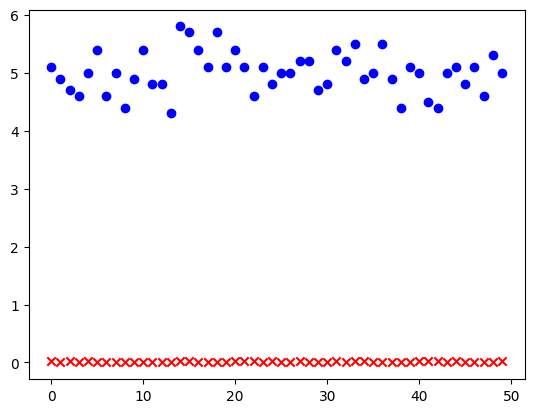

Epoch 2/10000, Discriminator Loss: 1.3992104530334473, Generator Loss: 0.6955133080482483
Epoch 3/10000, Discriminator Loss: 1.399067759513855, Generator Loss: 0.6953839659690857
Epoch 4/10000, Discriminator Loss: 1.3989291191101074, Generator Loss: 0.6952515244483948
Epoch 5/10000, Discriminator Loss: 1.3987985849380493, Generator Loss: 0.6951121687889099
Epoch 6/10000, Discriminator Loss: 1.3986488580703735, Generator Loss: 0.6949931979179382
Epoch 7/10000, Discriminator Loss: 1.3985216617584229, Generator Loss: 0.6948525905609131
Epoch 8/10000, Discriminator Loss: 1.3983783721923828, Generator Loss: 0.6947291493415833
Epoch 9/10000, Discriminator Loss: 1.3982441425323486, Generator Loss: 0.6945980787277222
Epoch 10/10000, Discriminator Loss: 1.3981070518493652, Generator Loss: 0.6944711208343506
Epoch 11/10000, Discriminator Loss: 1.3979713916778564, Generator Loss: 0.6943446397781372
Epoch 12/10000, Discriminator Loss: 1.3978421688079834, Generator Loss: 0.6942129731178284
Epoch 13

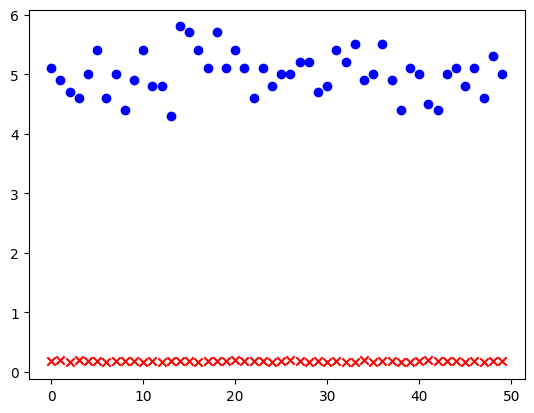

Epoch 102/10000, Discriminator Loss: 1.3860480785369873, Generator Loss: 0.6908226013183594
Epoch 103/10000, Discriminator Loss: 1.3859260082244873, Generator Loss: 0.6908655762672424
Epoch 104/10000, Discriminator Loss: 1.385798692703247, Generator Loss: 0.6909146308898926
Epoch 105/10000, Discriminator Loss: 1.3856792449951172, Generator Loss: 0.6909573078155518
Epoch 106/10000, Discriminator Loss: 1.3855557441711426, Generator Loss: 0.6910048723220825
Epoch 107/10000, Discriminator Loss: 1.3854291439056396, Generator Loss: 0.6910566687583923
Epoch 108/10000, Discriminator Loss: 1.3853087425231934, Generator Loss: 0.6911032795906067
Epoch 109/10000, Discriminator Loss: 1.3851902484893799, Generator Loss: 0.6911489963531494
Epoch 110/10000, Discriminator Loss: 1.3850643634796143, Generator Loss: 0.6912029385566711
Epoch 111/10000, Discriminator Loss: 1.3849425315856934, Generator Loss: 0.6912536025047302
Epoch 112/10000, Discriminator Loss: 1.3848226070404053, Generator Loss: 0.691303

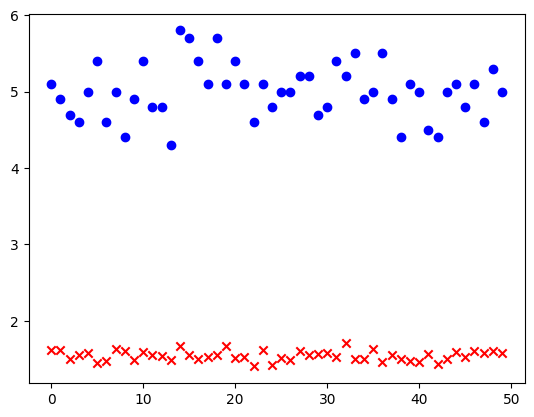

Epoch 202/10000, Discriminator Loss: 1.392354965209961, Generator Loss: 0.6857585310935974
Epoch 203/10000, Discriminator Loss: 1.3920505046844482, Generator Loss: 0.6861289739608765
Epoch 204/10000, Discriminator Loss: 1.3917129039764404, Generator Loss: 0.6865119338035583
Epoch 205/10000, Discriminator Loss: 1.391255259513855, Generator Loss: 0.6869847178459167
Epoch 206/10000, Discriminator Loss: 1.3906898498535156, Generator Loss: 0.6875548362731934
Epoch 207/10000, Discriminator Loss: 1.3902924060821533, Generator Loss: 0.6878976225852966
Epoch 208/10000, Discriminator Loss: 1.3896342515945435, Generator Loss: 0.6885040998458862
Epoch 209/10000, Discriminator Loss: 1.388989806175232, Generator Loss: 0.6890956163406372
Epoch 210/10000, Discriminator Loss: 1.388297438621521, Generator Loss: 0.6897020936012268
Epoch 211/10000, Discriminator Loss: 1.387707233428955, Generator Loss: 0.6902123093605042
Epoch 212/10000, Discriminator Loss: 1.3870830535888672, Generator Loss: 0.6907255649

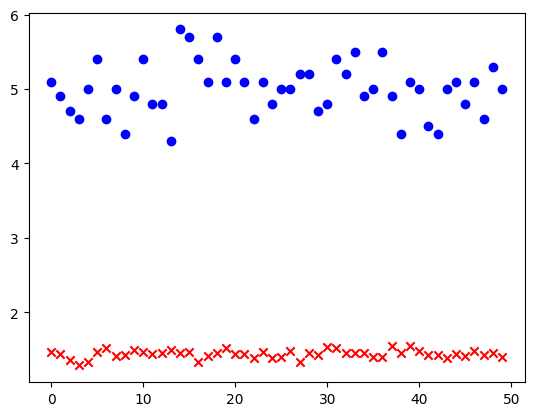

Epoch 302/10000, Discriminator Loss: 1.3845789432525635, Generator Loss: 0.6938086152076721
Epoch 303/10000, Discriminator Loss: 1.3847037553787231, Generator Loss: 0.6937282681465149
Epoch 304/10000, Discriminator Loss: 1.3847434520721436, Generator Loss: 0.6937294006347656
Epoch 305/10000, Discriminator Loss: 1.3847905397415161, Generator Loss: 0.6937233209609985
Epoch 306/10000, Discriminator Loss: 1.3847497701644897, Generator Loss: 0.6938037276268005
Epoch 307/10000, Discriminator Loss: 1.385059118270874, Generator Loss: 0.693528950214386
Epoch 308/10000, Discriminator Loss: 1.3852019309997559, Generator Loss: 0.6934291124343872
Epoch 309/10000, Discriminator Loss: 1.3852214813232422, Generator Loss: 0.6934500336647034
Epoch 310/10000, Discriminator Loss: 1.385265588760376, Generator Loss: 0.6934393048286438
Epoch 311/10000, Discriminator Loss: 1.3854845762252808, Generator Loss: 0.6932570934295654
Epoch 312/10000, Discriminator Loss: 1.3855011463165283, Generator Loss: 0.69327956

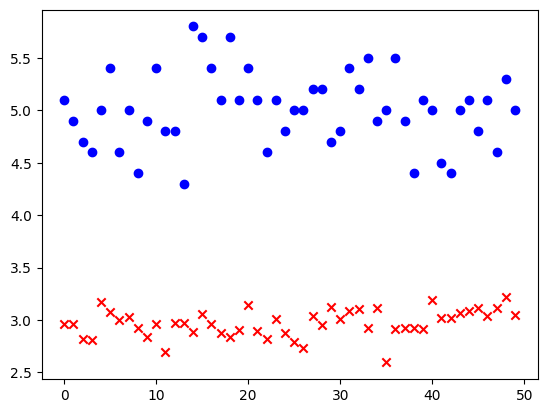

Epoch 402/10000, Discriminator Loss: 1.3861253261566162, Generator Loss: 0.693481981754303
Epoch 403/10000, Discriminator Loss: 1.385998010635376, Generator Loss: 0.6936225891113281
Epoch 404/10000, Discriminator Loss: 1.3858513832092285, Generator Loss: 0.6937565803527832
Epoch 405/10000, Discriminator Loss: 1.3856168985366821, Generator Loss: 0.6939929127693176
Epoch 406/10000, Discriminator Loss: 1.3857440948486328, Generator Loss: 0.6938888430595398
Epoch 407/10000, Discriminator Loss: 1.3852436542510986, Generator Loss: 0.6943536400794983
Epoch 408/10000, Discriminator Loss: 1.3849924802780151, Generator Loss: 0.6946180462837219
Epoch 409/10000, Discriminator Loss: 1.3848071098327637, Generator Loss: 0.6947625875473022
Epoch 410/10000, Discriminator Loss: 1.3846262693405151, Generator Loss: 0.6949467658996582
Epoch 411/10000, Discriminator Loss: 1.384293556213379, Generator Loss: 0.6952412128448486
Epoch 412/10000, Discriminator Loss: 1.38413405418396, Generator Loss: 0.6953850388

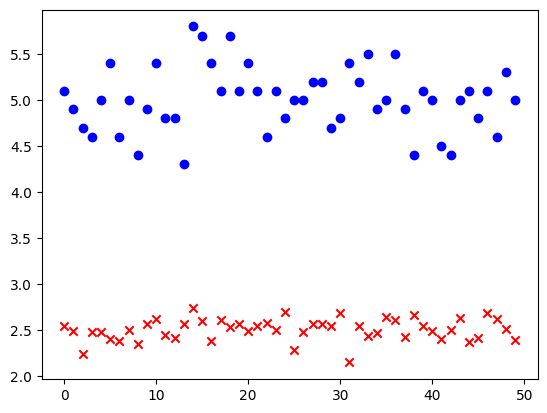

Epoch 502/10000, Discriminator Loss: 1.3805813789367676, Generator Loss: 0.6965281963348389
Epoch 503/10000, Discriminator Loss: 1.380491018295288, Generator Loss: 0.696623682975769
Epoch 504/10000, Discriminator Loss: 1.3805437088012695, Generator Loss: 0.6965698003768921
Epoch 505/10000, Discriminator Loss: 1.3804794549942017, Generator Loss: 0.6966409087181091
Epoch 506/10000, Discriminator Loss: 1.380422592163086, Generator Loss: 0.6966965198516846
Epoch 507/10000, Discriminator Loss: 1.3804032802581787, Generator Loss: 0.69671630859375
Epoch 508/10000, Discriminator Loss: 1.380296230316162, Generator Loss: 0.6968220472335815
Epoch 509/10000, Discriminator Loss: 1.380101203918457, Generator Loss: 0.6970166563987732
Epoch 510/10000, Discriminator Loss: 1.3801817893981934, Generator Loss: 0.6969234943389893
Epoch 511/10000, Discriminator Loss: 1.380034327507019, Generator Loss: 0.6970648765563965
Epoch 512/10000, Discriminator Loss: 1.3799352645874023, Generator Loss: 0.6971588134765

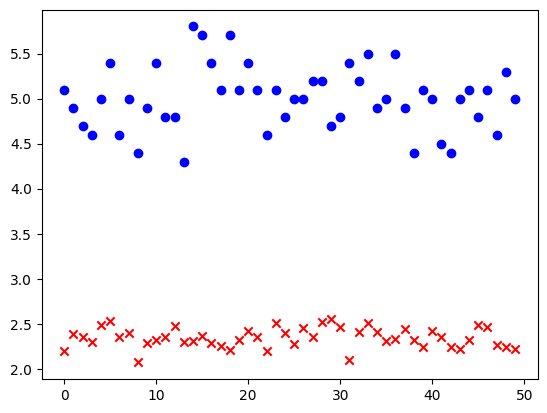

Epoch 602/10000, Discriminator Loss: 1.3725454807281494, Generator Loss: 0.7023323774337769
Epoch 603/10000, Discriminator Loss: 1.3723351955413818, Generator Loss: 0.7025130391120911
Epoch 604/10000, Discriminator Loss: 1.3721468448638916, Generator Loss: 0.7026722431182861
Epoch 605/10000, Discriminator Loss: 1.371962308883667, Generator Loss: 0.7028266787528992
Epoch 606/10000, Discriminator Loss: 1.3717690706253052, Generator Loss: 0.7029898166656494
Epoch 607/10000, Discriminator Loss: 1.3715672492980957, Generator Loss: 0.7031593918800354
Epoch 608/10000, Discriminator Loss: 1.3713858127593994, Generator Loss: 0.7033107280731201
Epoch 609/10000, Discriminator Loss: 1.3711735010147095, Generator Loss: 0.7034882307052612
Epoch 610/10000, Discriminator Loss: 1.3709704875946045, Generator Loss: 0.7036583423614502
Epoch 611/10000, Discriminator Loss: 1.3707773685455322, Generator Loss: 0.7038177251815796
Epoch 612/10000, Discriminator Loss: 1.370571494102478, Generator Loss: 0.7039883

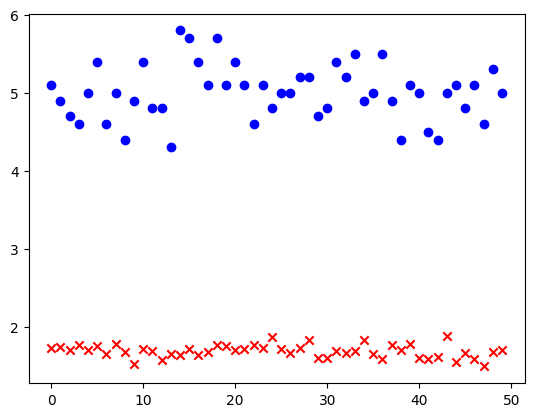

Epoch 702/10000, Discriminator Loss: 1.354623556137085, Generator Loss: 0.7116973996162415
Epoch 703/10000, Discriminator Loss: 1.3544113636016846, Generator Loss: 0.7117921710014343
Epoch 704/10000, Discriminator Loss: 1.354175329208374, Generator Loss: 0.7119130492210388
Epoch 705/10000, Discriminator Loss: 1.354001760482788, Generator Loss: 0.7119684815406799
Epoch 706/10000, Discriminator Loss: 1.3538806438446045, Generator Loss: 0.7119690179824829
Epoch 707/10000, Discriminator Loss: 1.3536465167999268, Generator Loss: 0.7120859026908875
Epoch 708/10000, Discriminator Loss: 1.353510856628418, Generator Loss: 0.712100625038147
Epoch 709/10000, Discriminator Loss: 1.3533591032028198, Generator Loss: 0.7121320962905884
Epoch 710/10000, Discriminator Loss: 1.3530941009521484, Generator Loss: 0.7122819423675537
Epoch 711/10000, Discriminator Loss: 1.3529155254364014, Generator Loss: 0.7123408317565918
Epoch 712/10000, Discriminator Loss: 1.35274076461792, Generator Loss: 0.712394177913

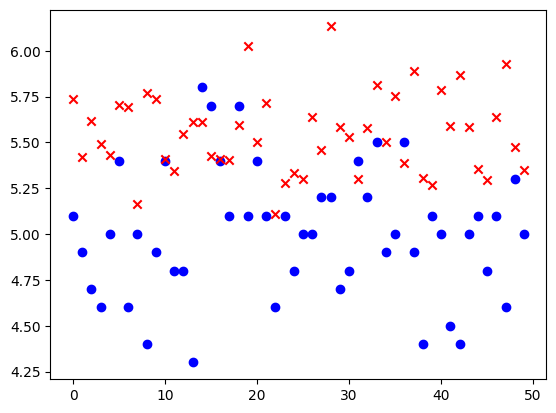

Epoch 802/10000, Discriminator Loss: 1.3803918361663818, Generator Loss: 0.6847373843193054
Epoch 803/10000, Discriminator Loss: 1.3806264400482178, Generator Loss: 0.6849390268325806
Epoch 804/10000, Discriminator Loss: 1.380241870880127, Generator Loss: 0.6857863664627075
Epoch 805/10000, Discriminator Loss: 1.3807282447814941, Generator Loss: 0.6857426166534424
Epoch 806/10000, Discriminator Loss: 1.38165283203125, Generator Loss: 0.6852559447288513
Epoch 807/10000, Discriminator Loss: 1.3811609745025635, Generator Loss: 0.6861820220947266
Epoch 808/10000, Discriminator Loss: 1.3819605112075806, Generator Loss: 0.6857855916023254
Epoch 809/10000, Discriminator Loss: 1.3827807903289795, Generator Loss: 0.6853488087654114
Epoch 810/10000, Discriminator Loss: 1.3835078477859497, Generator Loss: 0.6849844455718994
Epoch 811/10000, Discriminator Loss: 1.384347677230835, Generator Loss: 0.6844627261161804
Epoch 812/10000, Discriminator Loss: 1.384887933731079, Generator Loss: 0.6842188239

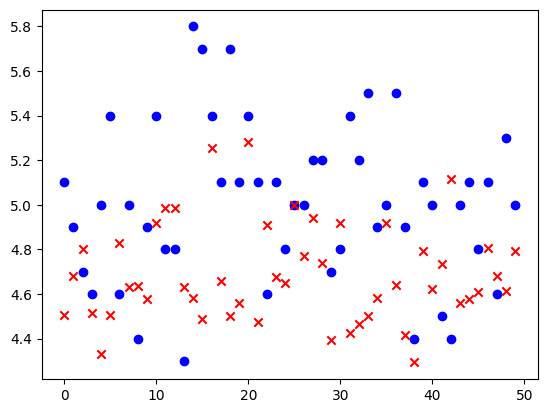

Epoch 902/10000, Discriminator Loss: 1.3832054138183594, Generator Loss: 0.6927586197853088
Epoch 903/10000, Discriminator Loss: 1.3835556507110596, Generator Loss: 0.6924312114715576
Epoch 904/10000, Discriminator Loss: 1.3830205202102661, Generator Loss: 0.6930580139160156
Epoch 905/10000, Discriminator Loss: 1.3831231594085693, Generator Loss: 0.6929985284805298
Epoch 906/10000, Discriminator Loss: 1.3835129737854004, Generator Loss: 0.692664623260498
Epoch 907/10000, Discriminator Loss: 1.3836050033569336, Generator Loss: 0.6925889849662781
Epoch 908/10000, Discriminator Loss: 1.3836593627929688, Generator Loss: 0.692568302154541
Epoch 909/10000, Discriminator Loss: 1.3837268352508545, Generator Loss: 0.6925922632217407
Epoch 910/10000, Discriminator Loss: 1.3837411403656006, Generator Loss: 0.6926136612892151
Epoch 911/10000, Discriminator Loss: 1.3838562965393066, Generator Loss: 0.6925944685935974
Epoch 912/10000, Discriminator Loss: 1.3837040662765503, Generator Loss: 0.6928569

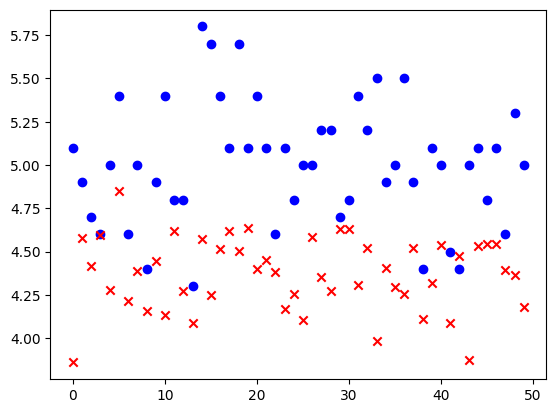

Epoch 1002/10000, Discriminator Loss: 1.3761762380599976, Generator Loss: 0.6984410881996155
Epoch 1003/10000, Discriminator Loss: 1.3761968612670898, Generator Loss: 0.6983553171157837
Epoch 1004/10000, Discriminator Loss: 1.3761227130889893, Generator Loss: 0.6983699202537537
Epoch 1005/10000, Discriminator Loss: 1.376124620437622, Generator Loss: 0.6983155608177185
Epoch 1006/10000, Discriminator Loss: 1.3760745525360107, Generator Loss: 0.698322057723999
Epoch 1007/10000, Discriminator Loss: 1.3759384155273438, Generator Loss: 0.6984161138534546
Epoch 1008/10000, Discriminator Loss: 1.3757601976394653, Generator Loss: 0.6985477209091187
Epoch 1009/10000, Discriminator Loss: 1.3757150173187256, Generator Loss: 0.6985518932342529
Epoch 1010/10000, Discriminator Loss: 1.3755159378051758, Generator Loss: 0.6987264752388
Epoch 1011/10000, Discriminator Loss: 1.3753767013549805, Generator Loss: 0.6988345980644226
Epoch 1012/10000, Discriminator Loss: 1.3752152919769287, Generator Loss: 0

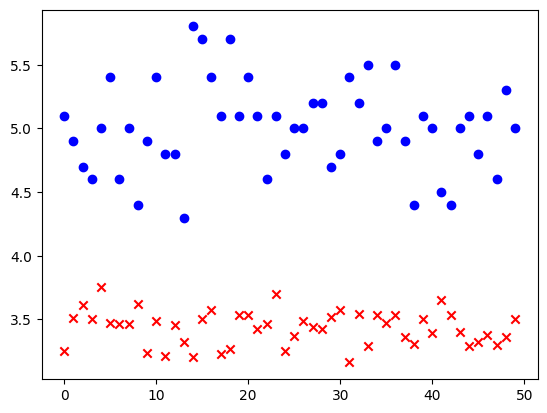

Epoch 1102/10000, Discriminator Loss: 1.3680800199508667, Generator Loss: 0.701973557472229
Epoch 1103/10000, Discriminator Loss: 1.3680377006530762, Generator Loss: 0.7020251750946045
Epoch 1104/10000, Discriminator Loss: 1.3680975437164307, Generator Loss: 0.7019491791725159
Epoch 1105/10000, Discriminator Loss: 1.367790699005127, Generator Loss: 0.702247142791748
Epoch 1106/10000, Discriminator Loss: 1.36767578125, Generator Loss: 0.7023364305496216
Epoch 1107/10000, Discriminator Loss: 1.367730975151062, Generator Loss: 0.7022411823272705
Epoch 1108/10000, Discriminator Loss: 1.3675339221954346, Generator Loss: 0.7023969888687134
Epoch 1109/10000, Discriminator Loss: 1.367321252822876, Generator Loss: 0.7025582790374756
Epoch 1110/10000, Discriminator Loss: 1.3672953844070435, Generator Loss: 0.7025145888328552
Epoch 1111/10000, Discriminator Loss: 1.3670618534088135, Generator Loss: 0.7026735544204712
Epoch 1112/10000, Discriminator Loss: 1.3668620586395264, Generator Loss: 0.7027

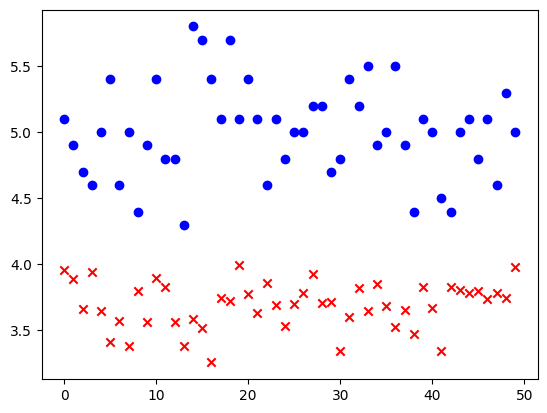

Epoch 1202/10000, Discriminator Loss: 1.3491015434265137, Generator Loss: 0.7155681848526001
Epoch 1203/10000, Discriminator Loss: 1.3487721681594849, Generator Loss: 0.715833842754364
Epoch 1204/10000, Discriminator Loss: 1.3484466075897217, Generator Loss: 0.7161093950271606
Epoch 1205/10000, Discriminator Loss: 1.3481922149658203, Generator Loss: 0.7162925601005554
Epoch 1206/10000, Discriminator Loss: 1.3479313850402832, Generator Loss: 0.7164955735206604
Epoch 1207/10000, Discriminator Loss: 1.3477630615234375, Generator Loss: 0.7165982723236084
Epoch 1208/10000, Discriminator Loss: 1.3474071025848389, Generator Loss: 0.7169186472892761
Epoch 1209/10000, Discriminator Loss: 1.3472589254379272, Generator Loss: 0.7170184254646301
Epoch 1210/10000, Discriminator Loss: 1.3470468521118164, Generator Loss: 0.717200517654419
Epoch 1211/10000, Discriminator Loss: 1.3466682434082031, Generator Loss: 0.7175861597061157
Epoch 1212/10000, Discriminator Loss: 1.3464775085449219, Generator Loss

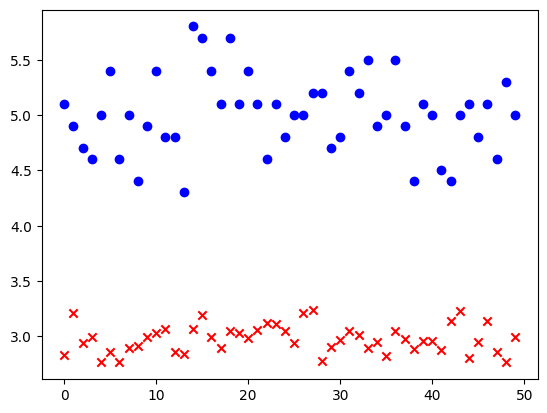

Epoch 1302/10000, Discriminator Loss: 1.3301512002944946, Generator Loss: 0.7274383306503296
Epoch 1303/10000, Discriminator Loss: 1.331183671951294, Generator Loss: 0.7260125875473022
Epoch 1304/10000, Discriminator Loss: 1.3325217962265015, Generator Loss: 0.7242594957351685
Epoch 1305/10000, Discriminator Loss: 1.3340556621551514, Generator Loss: 0.7222974300384521
Epoch 1306/10000, Discriminator Loss: 1.3351970911026, Generator Loss: 0.720750093460083
Epoch 1307/10000, Discriminator Loss: 1.3363165855407715, Generator Loss: 0.7192128896713257
Epoch 1308/10000, Discriminator Loss: 1.3376215696334839, Generator Loss: 0.7174774408340454
Epoch 1309/10000, Discriminator Loss: 1.3388047218322754, Generator Loss: 0.7158815860748291
Epoch 1310/10000, Discriminator Loss: 1.3401989936828613, Generator Loss: 0.7140565514564514
Epoch 1311/10000, Discriminator Loss: 1.3416762351989746, Generator Loss: 0.7121669054031372
Epoch 1312/10000, Discriminator Loss: 1.3428723812103271, Generator Loss: 0

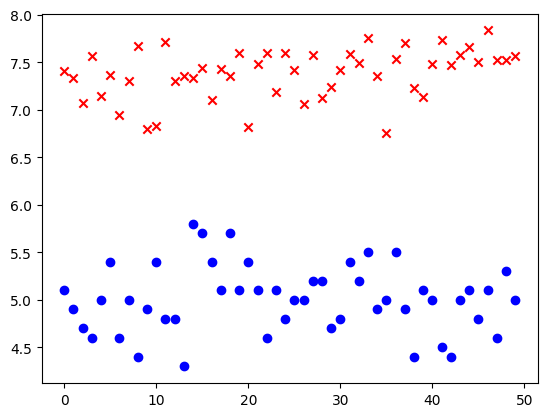

Epoch 1402/10000, Discriminator Loss: 1.3817696571350098, Generator Loss: 0.6835818290710449
Epoch 1403/10000, Discriminator Loss: 1.3815873861312866, Generator Loss: 0.6839982867240906
Epoch 1404/10000, Discriminator Loss: 1.3815529346466064, Generator Loss: 0.6842615008354187
Epoch 1405/10000, Discriminator Loss: 1.3815295696258545, Generator Loss: 0.6845104694366455
Epoch 1406/10000, Discriminator Loss: 1.3815436363220215, Generator Loss: 0.684709906578064
Epoch 1407/10000, Discriminator Loss: 1.3815042972564697, Generator Loss: 0.6849836111068726
Epoch 1408/10000, Discriminator Loss: 1.3815386295318604, Generator Loss: 0.6851722598075867
Epoch 1409/10000, Discriminator Loss: 1.3813250064849854, Generator Loss: 0.6856170892715454
Epoch 1410/10000, Discriminator Loss: 1.3815176486968994, Generator Loss: 0.6856517791748047
Epoch 1411/10000, Discriminator Loss: 1.3812460899353027, Generator Loss: 0.6861808896064758
Epoch 1412/10000, Discriminator Loss: 1.3812999725341797, Generator Los

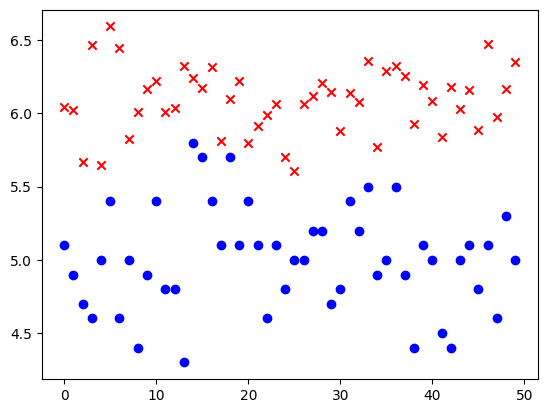

Epoch 1502/10000, Discriminator Loss: 1.3884748220443726, Generator Loss: 0.6812164187431335
Epoch 1503/10000, Discriminator Loss: 1.3880946636199951, Generator Loss: 0.6812679767608643
Epoch 1504/10000, Discriminator Loss: 1.387163519859314, Generator Loss: 0.6819382309913635
Epoch 1505/10000, Discriminator Loss: 1.3864436149597168, Generator Loss: 0.6823647022247314
Epoch 1506/10000, Discriminator Loss: 1.3859035968780518, Generator Loss: 0.6826663017272949
Epoch 1507/10000, Discriminator Loss: 1.3849127292633057, Generator Loss: 0.6834304928779602
Epoch 1508/10000, Discriminator Loss: 1.3842980861663818, Generator Loss: 0.683861255645752
Epoch 1509/10000, Discriminator Loss: 1.3832547664642334, Generator Loss: 0.6847164630889893
Epoch 1510/10000, Discriminator Loss: 1.3822531700134277, Generator Loss: 0.6855864524841309
Epoch 1511/10000, Discriminator Loss: 1.3815367221832275, Generator Loss: 0.6862114071846008
Epoch 1512/10000, Discriminator Loss: 1.3806405067443848, Generator Loss

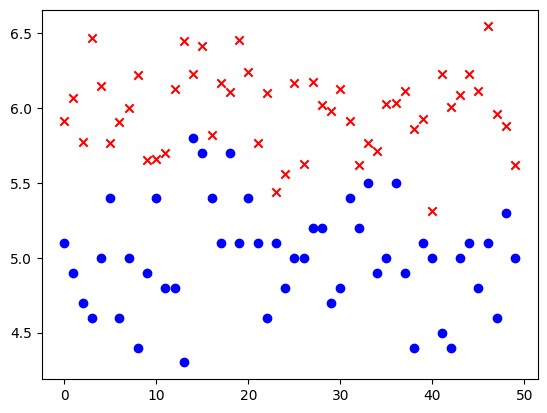

Epoch 1602/10000, Discriminator Loss: 1.3858766555786133, Generator Loss: 0.6833085417747498
Epoch 1603/10000, Discriminator Loss: 1.3856996297836304, Generator Loss: 0.6834878325462341
Epoch 1604/10000, Discriminator Loss: 1.3857333660125732, Generator Loss: 0.6834712028503418
Epoch 1605/10000, Discriminator Loss: 1.385548710823059, Generator Loss: 0.6836881041526794
Epoch 1606/10000, Discriminator Loss: 1.3854645490646362, Generator Loss: 0.6838132739067078
Epoch 1607/10000, Discriminator Loss: 1.385446548461914, Generator Loss: 0.6838966608047485
Epoch 1608/10000, Discriminator Loss: 1.385324239730835, Generator Loss: 0.6840888857841492
Epoch 1609/10000, Discriminator Loss: 1.385302186012268, Generator Loss: 0.6841838359832764
Epoch 1610/10000, Discriminator Loss: 1.3852097988128662, Generator Loss: 0.6843481659889221
Epoch 1611/10000, Discriminator Loss: 1.3852782249450684, Generator Loss: 0.6843478679656982
Epoch 1612/10000, Discriminator Loss: 1.3851892948150635, Generator Loss: 

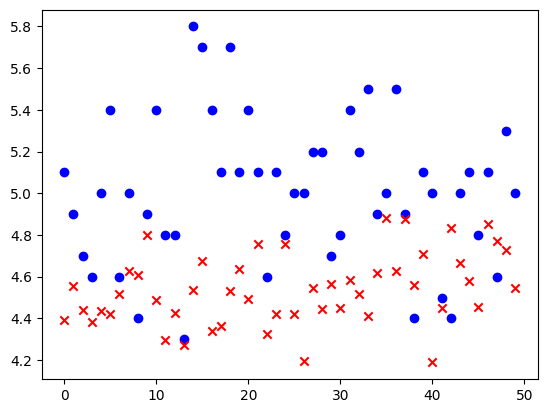

Epoch 1702/10000, Discriminator Loss: 1.3862829208374023, Generator Loss: 0.6876893043518066
Epoch 1703/10000, Discriminator Loss: 1.38614821434021, Generator Loss: 0.6878761053085327
Epoch 1704/10000, Discriminator Loss: 1.3860270977020264, Generator Loss: 0.6880034804344177
Epoch 1705/10000, Discriminator Loss: 1.3859200477600098, Generator Loss: 0.6881561279296875
Epoch 1706/10000, Discriminator Loss: 1.3860180377960205, Generator Loss: 0.6880602836608887
Epoch 1707/10000, Discriminator Loss: 1.385925531387329, Generator Loss: 0.6881574988365173
Epoch 1708/10000, Discriminator Loss: 1.3859790563583374, Generator Loss: 0.6881643533706665
Epoch 1709/10000, Discriminator Loss: 1.3857183456420898, Generator Loss: 0.6884665489196777
Epoch 1710/10000, Discriminator Loss: 1.3859270811080933, Generator Loss: 0.6882688999176025
Epoch 1711/10000, Discriminator Loss: 1.3857780694961548, Generator Loss: 0.6884323358535767
Epoch 1712/10000, Discriminator Loss: 1.3859014511108398, Generator Loss:

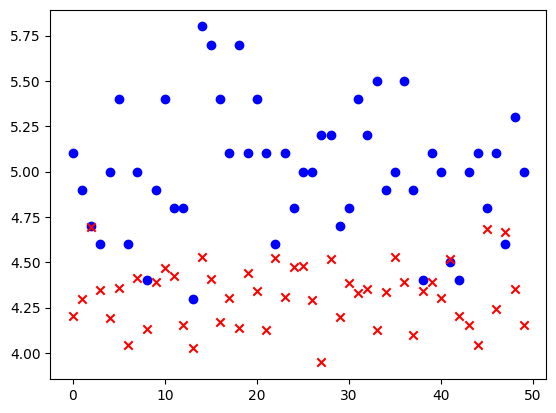

Epoch 1802/10000, Discriminator Loss: 1.3860067129135132, Generator Loss: 0.689674973487854
Epoch 1803/10000, Discriminator Loss: 1.3859010934829712, Generator Loss: 0.6897773146629333
Epoch 1804/10000, Discriminator Loss: 1.3859171867370605, Generator Loss: 0.6897558569908142
Epoch 1805/10000, Discriminator Loss: 1.3860325813293457, Generator Loss: 0.6896320581436157
Epoch 1806/10000, Discriminator Loss: 1.3860795497894287, Generator Loss: 0.6895781755447388
Epoch 1807/10000, Discriminator Loss: 1.3859121799468994, Generator Loss: 0.6897343397140503
Epoch 1808/10000, Discriminator Loss: 1.3858232498168945, Generator Loss: 0.6898151636123657
Epoch 1809/10000, Discriminator Loss: 1.3859169483184814, Generator Loss: 0.6897048950195312
Epoch 1810/10000, Discriminator Loss: 1.3859384059906006, Generator Loss: 0.6896695494651794
Epoch 1811/10000, Discriminator Loss: 1.386023759841919, Generator Loss: 0.6895666718482971
Epoch 1812/10000, Discriminator Loss: 1.3858424425125122, Generator Loss

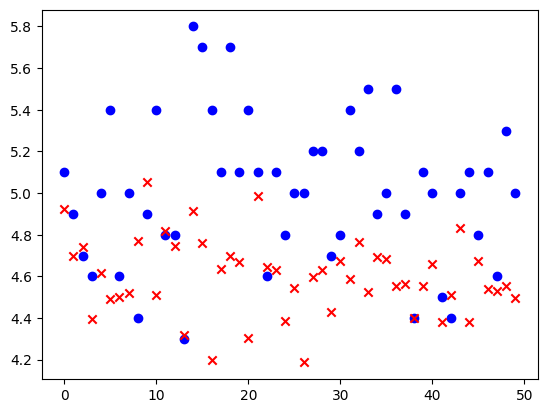

Epoch 1902/10000, Discriminator Loss: 1.385133981704712, Generator Loss: 0.6910073161125183
Epoch 1903/10000, Discriminator Loss: 1.3853111267089844, Generator Loss: 0.6908250451087952
Epoch 1904/10000, Discriminator Loss: 1.3852007389068604, Generator Loss: 0.690934956073761
Epoch 1905/10000, Discriminator Loss: 1.3853806257247925, Generator Loss: 0.690746545791626
Epoch 1906/10000, Discriminator Loss: 1.385260820388794, Generator Loss: 0.6908718943595886
Epoch 1907/10000, Discriminator Loss: 1.3853211402893066, Generator Loss: 0.6908038258552551
Epoch 1908/10000, Discriminator Loss: 1.385155200958252, Generator Loss: 0.6909721493721008
Epoch 1909/10000, Discriminator Loss: 1.3851654529571533, Generator Loss: 0.6909601092338562
Epoch 1910/10000, Discriminator Loss: 1.385349154472351, Generator Loss: 0.6907510161399841
Epoch 1911/10000, Discriminator Loss: 1.3851759433746338, Generator Loss: 0.6909361481666565
Epoch 1912/10000, Discriminator Loss: 1.3851990699768066, Generator Loss: 0.

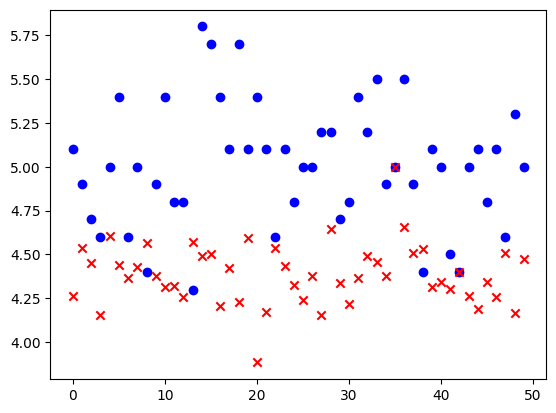

Epoch 2002/10000, Discriminator Loss: 1.3846179246902466, Generator Loss: 0.6919260621070862
Epoch 2003/10000, Discriminator Loss: 1.3844358921051025, Generator Loss: 0.6921069622039795
Epoch 2004/10000, Discriminator Loss: 1.3846653699874878, Generator Loss: 0.6918525099754333
Epoch 2005/10000, Discriminator Loss: 1.3846086263656616, Generator Loss: 0.6918904185295105
Epoch 2006/10000, Discriminator Loss: 1.3842774629592896, Generator Loss: 0.6922307014465332
Epoch 2007/10000, Discriminator Loss: 1.3846126794815063, Generator Loss: 0.6918479800224304
Epoch 2008/10000, Discriminator Loss: 1.384460210800171, Generator Loss: 0.6920158267021179
Epoch 2009/10000, Discriminator Loss: 1.3845678567886353, Generator Loss: 0.6918830871582031
Epoch 2010/10000, Discriminator Loss: 1.3847119808197021, Generator Loss: 0.6917112469673157
Epoch 2011/10000, Discriminator Loss: 1.3845272064208984, Generator Loss: 0.6919043660163879
Epoch 2012/10000, Discriminator Loss: 1.384486198425293, Generator Loss

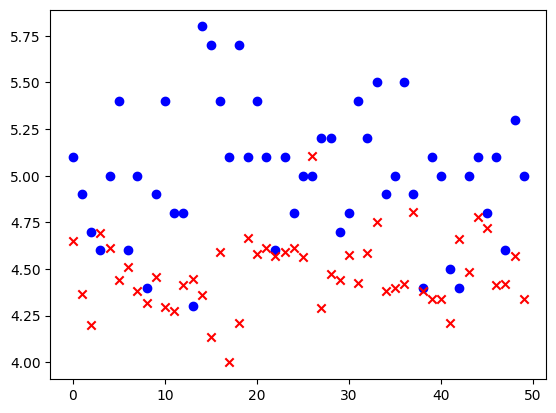

Epoch 2102/10000, Discriminator Loss: 1.383663296699524, Generator Loss: 0.6921550035476685
Epoch 2103/10000, Discriminator Loss: 1.383781909942627, Generator Loss: 0.6920168399810791
Epoch 2104/10000, Discriminator Loss: 1.3836113214492798, Generator Loss: 0.6921679973602295
Epoch 2105/10000, Discriminator Loss: 1.3836255073547363, Generator Loss: 0.6921356320381165
Epoch 2106/10000, Discriminator Loss: 1.3836627006530762, Generator Loss: 0.6920875310897827
Epoch 2107/10000, Discriminator Loss: 1.3836643695831299, Generator Loss: 0.6920691132545471
Epoch 2108/10000, Discriminator Loss: 1.3837724924087524, Generator Loss: 0.6919509172439575
Epoch 2109/10000, Discriminator Loss: 1.3836489915847778, Generator Loss: 0.6920795440673828
Epoch 2110/10000, Discriminator Loss: 1.3837108612060547, Generator Loss: 0.6919956803321838
Epoch 2111/10000, Discriminator Loss: 1.3834636211395264, Generator Loss: 0.6922405958175659
Epoch 2112/10000, Discriminator Loss: 1.3837934732437134, Generator Loss

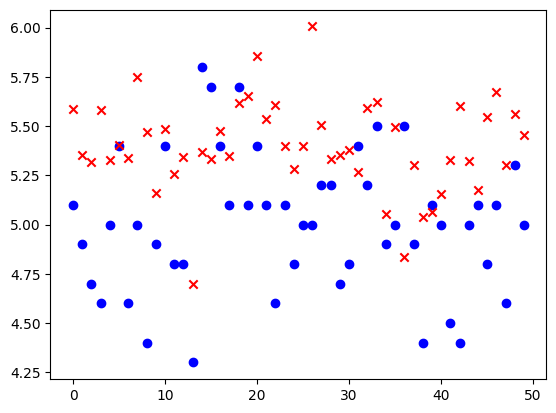

Epoch 2202/10000, Discriminator Loss: 1.3831661939620972, Generator Loss: 0.694108247756958
Epoch 2203/10000, Discriminator Loss: 1.3830890655517578, Generator Loss: 0.6942332983016968
Epoch 2204/10000, Discriminator Loss: 1.3830757141113281, Generator Loss: 0.6942796111106873
Epoch 2205/10000, Discriminator Loss: 1.3830296993255615, Generator Loss: 0.694362998008728
Epoch 2206/10000, Discriminator Loss: 1.3829970359802246, Generator Loss: 0.6944328546524048
Epoch 2207/10000, Discriminator Loss: 1.3829152584075928, Generator Loss: 0.6945520043373108
Epoch 2208/10000, Discriminator Loss: 1.382934331893921, Generator Loss: 0.6945655345916748
Epoch 2209/10000, Discriminator Loss: 1.3828577995300293, Generator Loss: 0.6946789622306824
Epoch 2210/10000, Discriminator Loss: 1.3827732801437378, Generator Loss: 0.6947985291481018
Epoch 2211/10000, Discriminator Loss: 1.382763147354126, Generator Loss: 0.6948416233062744
Epoch 2212/10000, Discriminator Loss: 1.3826704025268555, Generator Loss: 

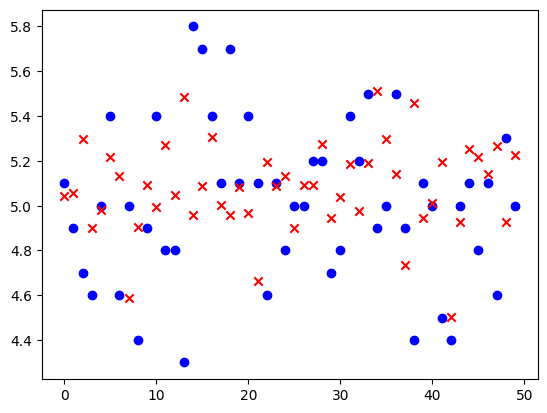

Epoch 2302/10000, Discriminator Loss: 1.3817801475524902, Generator Loss: 0.6964513659477234
Epoch 2303/10000, Discriminator Loss: 1.3813366889953613, Generator Loss: 0.696794331073761
Epoch 2304/10000, Discriminator Loss: 1.3813234567642212, Generator Loss: 0.6967211961746216
Epoch 2305/10000, Discriminator Loss: 1.3812497854232788, Generator Loss: 0.6967185735702515
Epoch 2306/10000, Discriminator Loss: 1.381213665008545, Generator Loss: 0.6966988444328308
Epoch 2307/10000, Discriminator Loss: 1.3809329271316528, Generator Loss: 0.6969438195228577
Epoch 2308/10000, Discriminator Loss: 1.3808352947235107, Generator Loss: 0.6970260143280029
Epoch 2309/10000, Discriminator Loss: 1.3806430101394653, Generator Loss: 0.6972063183784485
Epoch 2310/10000, Discriminator Loss: 1.3806761503219604, Generator Loss: 0.6971655488014221
Epoch 2311/10000, Discriminator Loss: 1.3806222677230835, Generator Loss: 0.697226881980896
Epoch 2312/10000, Discriminator Loss: 1.3807252645492554, Generator Loss:

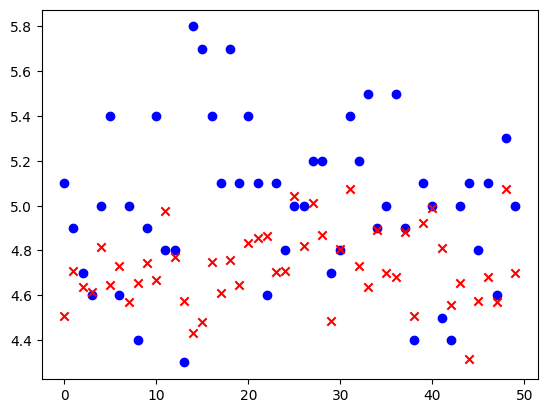

Epoch 2402/10000, Discriminator Loss: 1.3823453187942505, Generator Loss: 0.6973879337310791
Epoch 2403/10000, Discriminator Loss: 1.382783055305481, Generator Loss: 0.6973791718482971
Epoch 2404/10000, Discriminator Loss: 1.3836318254470825, Generator Loss: 0.6969053149223328
Epoch 2405/10000, Discriminator Loss: 1.384275197982788, Generator Loss: 0.6965680122375488
Epoch 2406/10000, Discriminator Loss: 1.385362148284912, Generator Loss: 0.6957317590713501
Epoch 2407/10000, Discriminator Loss: 1.3858511447906494, Generator Loss: 0.6954193115234375
Epoch 2408/10000, Discriminator Loss: 1.3866100311279297, Generator Loss: 0.694781482219696
Epoch 2409/10000, Discriminator Loss: 1.3872098922729492, Generator Loss: 0.6941749453544617
Epoch 2410/10000, Discriminator Loss: 1.387575626373291, Generator Loss: 0.6937513947486877
Epoch 2411/10000, Discriminator Loss: 1.3875877857208252, Generator Loss: 0.6935983300209045
Epoch 2412/10000, Discriminator Loss: 1.3871897459030151, Generator Loss: 0

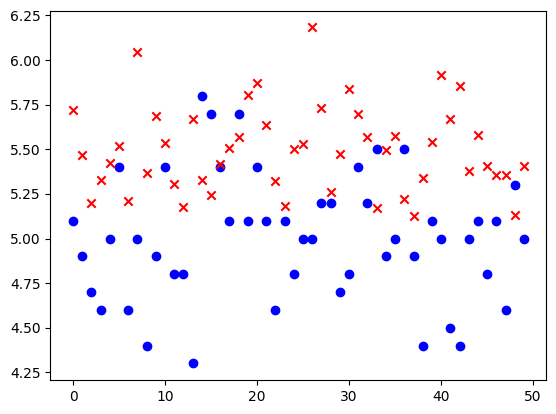

Epoch 2502/10000, Discriminator Loss: 1.3863661289215088, Generator Loss: 0.689564049243927
Epoch 2503/10000, Discriminator Loss: 1.3861229419708252, Generator Loss: 0.689900815486908
Epoch 2504/10000, Discriminator Loss: 1.3858013153076172, Generator Loss: 0.6901246905326843
Epoch 2505/10000, Discriminator Loss: 1.3852431774139404, Generator Loss: 0.6904247999191284
Epoch 2506/10000, Discriminator Loss: 1.3844408988952637, Generator Loss: 0.6908292174339294
Epoch 2507/10000, Discriminator Loss: 1.3834140300750732, Generator Loss: 0.6913959980010986
Epoch 2508/10000, Discriminator Loss: 1.382584810256958, Generator Loss: 0.6917204856872559
Epoch 2509/10000, Discriminator Loss: 1.3814811706542969, Generator Loss: 0.6924362182617188
Epoch 2510/10000, Discriminator Loss: 1.380378246307373, Generator Loss: 0.693220853805542
Epoch 2511/10000, Discriminator Loss: 1.3792022466659546, Generator Loss: 0.6941741108894348
Epoch 2512/10000, Discriminator Loss: 1.3788833618164062, Generator Loss: 0

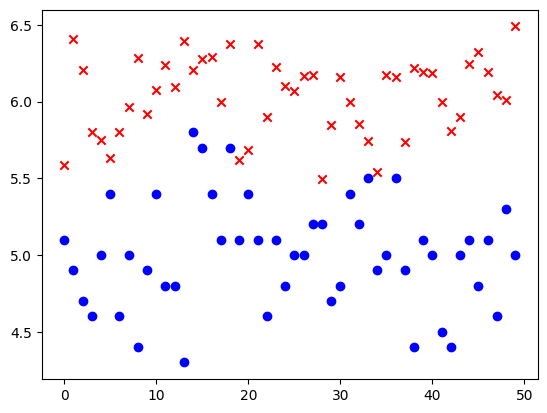

Epoch 2602/10000, Discriminator Loss: 1.3843848705291748, Generator Loss: 0.6931589245796204
Epoch 2603/10000, Discriminator Loss: 1.3840324878692627, Generator Loss: 0.6938115954399109
Epoch 2604/10000, Discriminator Loss: 1.384314775466919, Generator Loss: 0.6937972903251648
Epoch 2605/10000, Discriminator Loss: 1.3841261863708496, Generator Loss: 0.6942460536956787
Epoch 2606/10000, Discriminator Loss: 1.3843295574188232, Generator Loss: 0.694275975227356
Epoch 2607/10000, Discriminator Loss: 1.3838233947753906, Generator Loss: 0.6950109601020813
Epoch 2608/10000, Discriminator Loss: 1.3840928077697754, Generator Loss: 0.6949384212493896
Epoch 2609/10000, Discriminator Loss: 1.3840839862823486, Generator Loss: 0.6951364278793335
Epoch 2610/10000, Discriminator Loss: 1.3837800025939941, Generator Loss: 0.6956184506416321
Epoch 2611/10000, Discriminator Loss: 1.3838200569152832, Generator Loss: 0.6957370638847351
Epoch 2612/10000, Discriminator Loss: 1.3836369514465332, Generator Loss

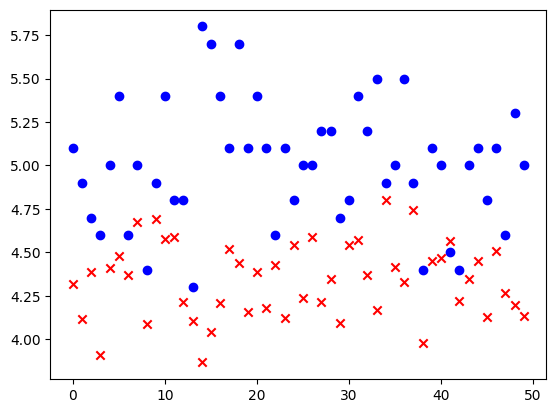

Epoch 2702/10000, Discriminator Loss: 1.383760929107666, Generator Loss: 0.6986336708068848
Epoch 2703/10000, Discriminator Loss: 1.383888840675354, Generator Loss: 0.6985765099525452
Epoch 2704/10000, Discriminator Loss: 1.3839119672775269, Generator Loss: 0.698604941368103
Epoch 2705/10000, Discriminator Loss: 1.3836214542388916, Generator Loss: 0.6989215016365051
Epoch 2706/10000, Discriminator Loss: 1.383678913116455, Generator Loss: 0.6988503336906433
Epoch 2707/10000, Discriminator Loss: 1.3835759162902832, Generator Loss: 0.6989122033119202
Epoch 2708/10000, Discriminator Loss: 1.3831136226654053, Generator Loss: 0.6993345618247986
Epoch 2709/10000, Discriminator Loss: 1.3826349973678589, Generator Loss: 0.6997563242912292
Epoch 2710/10000, Discriminator Loss: 1.38297438621521, Generator Loss: 0.6991631984710693
Epoch 2711/10000, Discriminator Loss: 1.3826782703399658, Generator Loss: 0.6992856860160828
Epoch 2712/10000, Discriminator Loss: 1.3821778297424316, Generator Loss: 0.

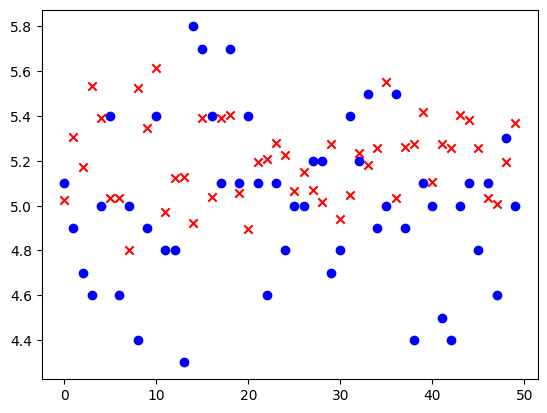

Epoch 2802/10000, Discriminator Loss: 1.3943321704864502, Generator Loss: 0.684013307094574
Epoch 2803/10000, Discriminator Loss: 1.3951010704040527, Generator Loss: 0.6840144395828247
Epoch 2804/10000, Discriminator Loss: 1.3969719409942627, Generator Loss: 0.6827855110168457
Epoch 2805/10000, Discriminator Loss: 1.3982527256011963, Generator Loss: 0.6819692850112915
Epoch 2806/10000, Discriminator Loss: 1.3991734981536865, Generator Loss: 0.6814796328544617
Epoch 2807/10000, Discriminator Loss: 1.3999505043029785, Generator Loss: 0.6809526085853577
Epoch 2808/10000, Discriminator Loss: 1.4003279209136963, Generator Loss: 0.6806385517120361
Epoch 2809/10000, Discriminator Loss: 1.4006597995758057, Generator Loss: 0.6802066564559937
Epoch 2810/10000, Discriminator Loss: 1.400943636894226, Generator Loss: 0.6796922087669373
Epoch 2811/10000, Discriminator Loss: 1.400891900062561, Generator Loss: 0.6793531179428101
Epoch 2812/10000, Discriminator Loss: 1.4006125926971436, Generator Loss:

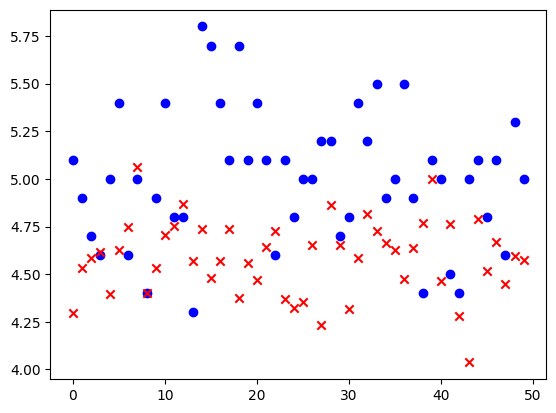

Epoch 2902/10000, Discriminator Loss: 1.3867671489715576, Generator Loss: 0.6958885192871094
Epoch 2903/10000, Discriminator Loss: 1.3866147994995117, Generator Loss: 0.6961567401885986
Epoch 2904/10000, Discriminator Loss: 1.3867568969726562, Generator Loss: 0.6961440443992615
Epoch 2905/10000, Discriminator Loss: 1.38673996925354, Generator Loss: 0.6962769031524658
Epoch 2906/10000, Discriminator Loss: 1.3869476318359375, Generator Loss: 0.6962091326713562
Epoch 2907/10000, Discriminator Loss: 1.3872153759002686, Generator Loss: 0.6960752606391907
Epoch 2908/10000, Discriminator Loss: 1.3872883319854736, Generator Loss: 0.696147084236145
Epoch 2909/10000, Discriminator Loss: 1.3872052431106567, Generator Loss: 0.6963804364204407
Epoch 2910/10000, Discriminator Loss: 1.387305736541748, Generator Loss: 0.6964173913002014
Epoch 2911/10000, Discriminator Loss: 1.3872261047363281, Generator Loss: 0.696628749370575
Epoch 2912/10000, Discriminator Loss: 1.387502670288086, Generator Loss: 0.

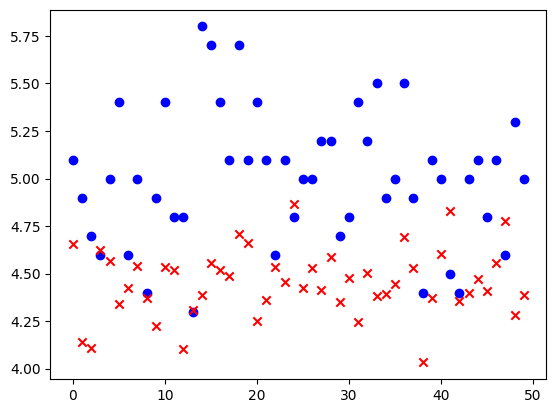

Epoch 3002/10000, Discriminator Loss: 1.3872020244598389, Generator Loss: 0.692594587802887
Epoch 3003/10000, Discriminator Loss: 1.387843132019043, Generator Loss: 0.6915833950042725
Epoch 3004/10000, Discriminator Loss: 1.3872652053833008, Generator Loss: 0.6918711066246033
Epoch 3005/10000, Discriminator Loss: 1.3867714405059814, Generator Loss: 0.6919988989830017
Epoch 3006/10000, Discriminator Loss: 1.385678768157959, Generator Loss: 0.6929237246513367
Epoch 3007/10000, Discriminator Loss: 1.3862988948822021, Generator Loss: 0.6919008493423462
Epoch 3008/10000, Discriminator Loss: 1.3861291408538818, Generator Loss: 0.6918003559112549
Epoch 3009/10000, Discriminator Loss: 1.385554552078247, Generator Loss: 0.6922585368156433
Epoch 3010/10000, Discriminator Loss: 1.385878086090088, Generator Loss: 0.6915745735168457
Epoch 3011/10000, Discriminator Loss: 1.3861815929412842, Generator Loss: 0.69109046459198
Epoch 3012/10000, Discriminator Loss: 1.3855278491973877, Generator Loss: 0.6

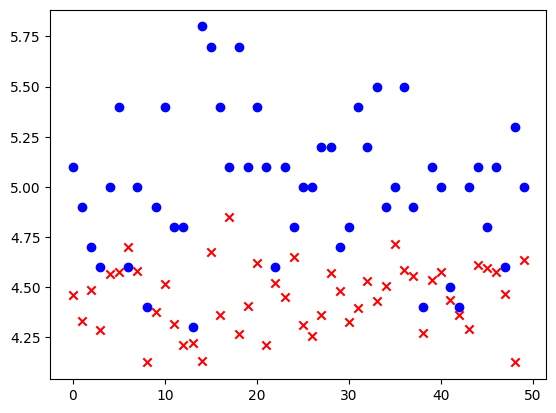

Epoch 3102/10000, Discriminator Loss: 1.3886841535568237, Generator Loss: 0.6934971809387207
Epoch 3103/10000, Discriminator Loss: 1.3886444568634033, Generator Loss: 0.6933791637420654
Epoch 3104/10000, Discriminator Loss: 1.3881142139434814, Generator Loss: 0.6938523054122925
Epoch 3105/10000, Discriminator Loss: 1.3884692192077637, Generator Loss: 0.6933652758598328
Epoch 3106/10000, Discriminator Loss: 1.3884340524673462, Generator Loss: 0.6932860612869263
Epoch 3107/10000, Discriminator Loss: 1.388077974319458, Generator Loss: 0.6935663819313049
Epoch 3108/10000, Discriminator Loss: 1.387974500656128, Generator Loss: 0.6935811638832092
Epoch 3109/10000, Discriminator Loss: 1.3881278038024902, Generator Loss: 0.6933338642120361
Epoch 3110/10000, Discriminator Loss: 1.387932300567627, Generator Loss: 0.6934519410133362
Epoch 3111/10000, Discriminator Loss: 1.387970209121704, Generator Loss: 0.693358302116394
Epoch 3112/10000, Discriminator Loss: 1.3878202438354492, Generator Loss: 0

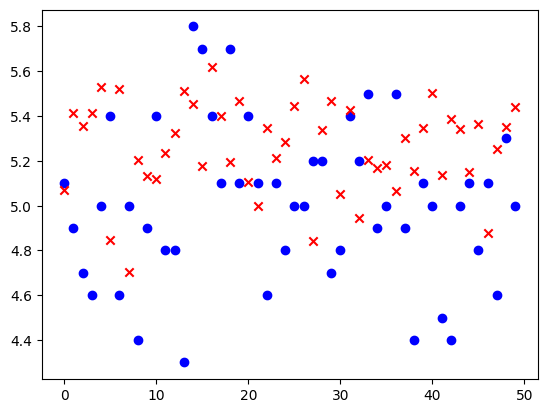

Epoch 3202/10000, Discriminator Loss: 1.3877383470535278, Generator Loss: 0.6937692761421204
Epoch 3203/10000, Discriminator Loss: 1.3879175186157227, Generator Loss: 0.6934910416603088
Epoch 3204/10000, Discriminator Loss: 1.3877825736999512, Generator Loss: 0.6935285925865173
Epoch 3205/10000, Discriminator Loss: 1.3874895572662354, Generator Loss: 0.6937388777732849
Epoch 3206/10000, Discriminator Loss: 1.3877456188201904, Generator Loss: 0.6933757066726685
Epoch 3207/10000, Discriminator Loss: 1.3877193927764893, Generator Loss: 0.6933075785636902
Epoch 3208/10000, Discriminator Loss: 1.3875240087509155, Generator Loss: 0.693390429019928
Epoch 3209/10000, Discriminator Loss: 1.3875389099121094, Generator Loss: 0.6932833790779114
Epoch 3210/10000, Discriminator Loss: 1.3876584768295288, Generator Loss: 0.6930915117263794
Epoch 3211/10000, Discriminator Loss: 1.3878034353256226, Generator Loss: 0.6928672790527344
Epoch 3212/10000, Discriminator Loss: 1.3875558376312256, Generator Los

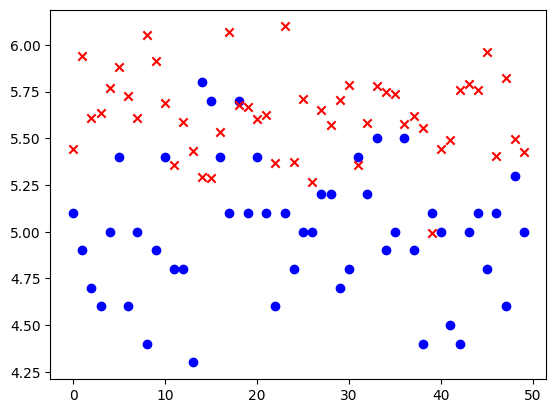

Epoch 3302/10000, Discriminator Loss: 1.3861759901046753, Generator Loss: 0.6934707164764404
Epoch 3303/10000, Discriminator Loss: 1.3863542079925537, Generator Loss: 0.6935470104217529
Epoch 3304/10000, Discriminator Loss: 1.3856050968170166, Generator Loss: 0.6945722103118896
Epoch 3305/10000, Discriminator Loss: 1.3862658739089966, Generator Loss: 0.6941465139389038
Epoch 3306/10000, Discriminator Loss: 1.3862333297729492, Generator Loss: 0.6944196224212646
Epoch 3307/10000, Discriminator Loss: 1.3862632513046265, Generator Loss: 0.6946206092834473
Epoch 3308/10000, Discriminator Loss: 1.3864898681640625, Generator Loss: 0.694593608379364
Epoch 3309/10000, Discriminator Loss: 1.3866887092590332, Generator Loss: 0.694563090801239
Epoch 3310/10000, Discriminator Loss: 1.3866727352142334, Generator Loss: 0.6947571039199829
Epoch 3311/10000, Discriminator Loss: 1.3869743347167969, Generator Loss: 0.6946286559104919
Epoch 3312/10000, Discriminator Loss: 1.3871136903762817, Generator Loss

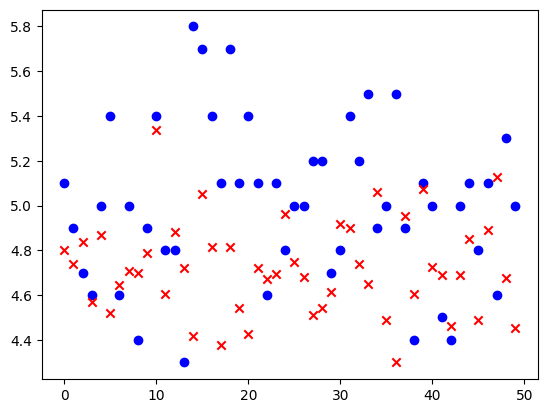

Epoch 3402/10000, Discriminator Loss: 1.3863945007324219, Generator Loss: 0.6949216723442078
Epoch 3403/10000, Discriminator Loss: 1.3865087032318115, Generator Loss: 0.6947463750839233
Epoch 3404/10000, Discriminator Loss: 1.3865997791290283, Generator Loss: 0.6946014165878296
Epoch 3405/10000, Discriminator Loss: 1.386466383934021, Generator Loss: 0.6946865320205688
Epoch 3406/10000, Discriminator Loss: 1.386704444885254, Generator Loss: 0.69439697265625
Epoch 3407/10000, Discriminator Loss: 1.3867520093917847, Generator Loss: 0.6943055987358093
Epoch 3408/10000, Discriminator Loss: 1.3868956565856934, Generator Loss: 0.694120466709137
Epoch 3409/10000, Discriminator Loss: 1.3868780136108398, Generator Loss: 0.6941030025482178
Epoch 3410/10000, Discriminator Loss: 1.3870165348052979, Generator Loss: 0.6939307451248169
Epoch 3411/10000, Discriminator Loss: 1.3871209621429443, Generator Loss: 0.693797767162323
Epoch 3412/10000, Discriminator Loss: 1.387333631515503, Generator Loss: 0.6

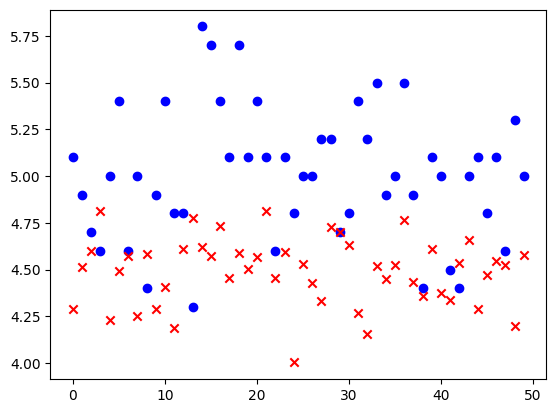

Epoch 3502/10000, Discriminator Loss: 1.3893097639083862, Generator Loss: 0.6880597472190857
Epoch 3503/10000, Discriminator Loss: 1.3891496658325195, Generator Loss: 0.6882623434066772
Epoch 3504/10000, Discriminator Loss: 1.3891816139221191, Generator Loss: 0.6882579922676086
Epoch 3505/10000, Discriminator Loss: 1.3891267776489258, Generator Loss: 0.6883406639099121
Epoch 3506/10000, Discriminator Loss: 1.3887763023376465, Generator Loss: 0.6886811256408691
Epoch 3507/10000, Discriminator Loss: 1.3889822959899902, Generator Loss: 0.6884351372718811
Epoch 3508/10000, Discriminator Loss: 1.3886268138885498, Generator Loss: 0.6887504458427429
Epoch 3509/10000, Discriminator Loss: 1.388404130935669, Generator Loss: 0.6889398097991943
Epoch 3510/10000, Discriminator Loss: 1.3884358406066895, Generator Loss: 0.6887773275375366
Epoch 3511/10000, Discriminator Loss: 1.3881118297576904, Generator Loss: 0.6890087127685547
Epoch 3512/10000, Discriminator Loss: 1.387831211090088, Generator Loss

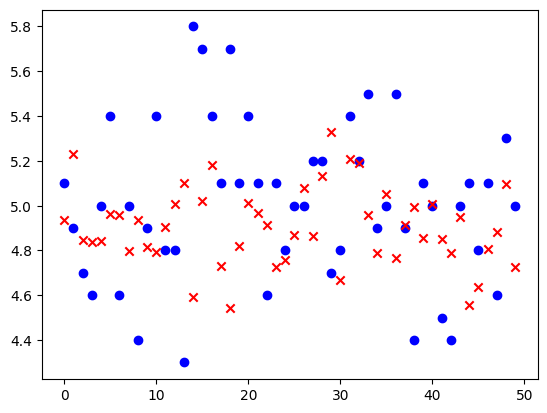

Epoch 3602/10000, Discriminator Loss: 1.3883516788482666, Generator Loss: 0.6961433291435242
Epoch 3603/10000, Discriminator Loss: 1.3885650634765625, Generator Loss: 0.6959986090660095
Epoch 3604/10000, Discriminator Loss: 1.3889219760894775, Generator Loss: 0.6957154273986816
Epoch 3605/10000, Discriminator Loss: 1.3889341354370117, Generator Loss: 0.6957587599754333
Epoch 3606/10000, Discriminator Loss: 1.3893399238586426, Generator Loss: 0.6954128742218018
Epoch 3607/10000, Discriminator Loss: 1.3894469738006592, Generator Loss: 0.6953611969947815
Epoch 3608/10000, Discriminator Loss: 1.3897178173065186, Generator Loss: 0.6951418519020081
Epoch 3609/10000, Discriminator Loss: 1.3897204399108887, Generator Loss: 0.6951839923858643
Epoch 3610/10000, Discriminator Loss: 1.3897147178649902, Generator Loss: 0.6952166557312012
Epoch 3611/10000, Discriminator Loss: 1.3898329734802246, Generator Loss: 0.6951531767845154
Epoch 3612/10000, Discriminator Loss: 1.3898663520812988, Generator Lo

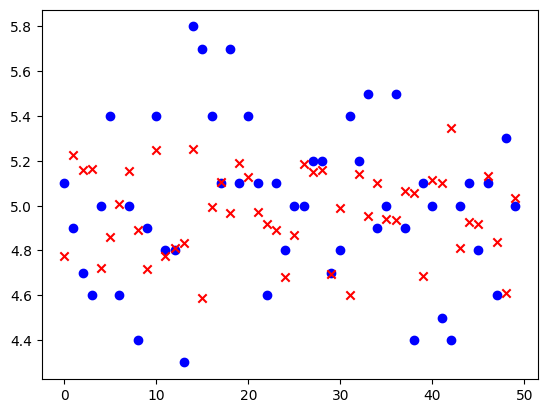

Epoch 3702/10000, Discriminator Loss: 1.3866634368896484, Generator Loss: 0.693146824836731
Epoch 3703/10000, Discriminator Loss: 1.3868129253387451, Generator Loss: 0.692962646484375
Epoch 3704/10000, Discriminator Loss: 1.3867566585540771, Generator Loss: 0.6929824352264404
Epoch 3705/10000, Discriminator Loss: 1.3867779970169067, Generator Loss: 0.692918062210083
Epoch 3706/10000, Discriminator Loss: 1.3867415189743042, Generator Loss: 0.692922830581665
Epoch 3707/10000, Discriminator Loss: 1.3866899013519287, Generator Loss: 0.692934513092041
Epoch 3708/10000, Discriminator Loss: 1.3866472244262695, Generator Loss: 0.692935049533844
Epoch 3709/10000, Discriminator Loss: 1.3866961002349854, Generator Loss: 0.6928386092185974
Epoch 3710/10000, Discriminator Loss: 1.3866835832595825, Generator Loss: 0.6927986741065979
Epoch 3711/10000, Discriminator Loss: 1.3865814208984375, Generator Loss: 0.6928431987762451
Epoch 3712/10000, Discriminator Loss: 1.3865165710449219, Generator Loss: 0.

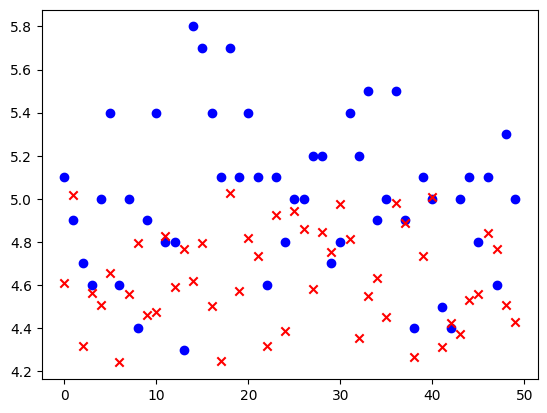

Epoch 3802/10000, Discriminator Loss: 1.3880012035369873, Generator Loss: 0.6903141736984253
Epoch 3803/10000, Discriminator Loss: 1.387929916381836, Generator Loss: 0.6904100775718689
Epoch 3804/10000, Discriminator Loss: 1.3877532482147217, Generator Loss: 0.6905993819236755
Epoch 3805/10000, Discriminator Loss: 1.3878018856048584, Generator Loss: 0.6905564069747925
Epoch 3806/10000, Discriminator Loss: 1.3877577781677246, Generator Loss: 0.6905955672264099
Epoch 3807/10000, Discriminator Loss: 1.3876428604125977, Generator Loss: 0.6907193660736084
Epoch 3808/10000, Discriminator Loss: 1.3875279426574707, Generator Loss: 0.6908206939697266
Epoch 3809/10000, Discriminator Loss: 1.387498140335083, Generator Loss: 0.6908470392227173
Epoch 3810/10000, Discriminator Loss: 1.3874887228012085, Generator Loss: 0.6908385753631592
Epoch 3811/10000, Discriminator Loss: 1.3872480392456055, Generator Loss: 0.6910629272460938
Epoch 3812/10000, Discriminator Loss: 1.3872544765472412, Generator Loss

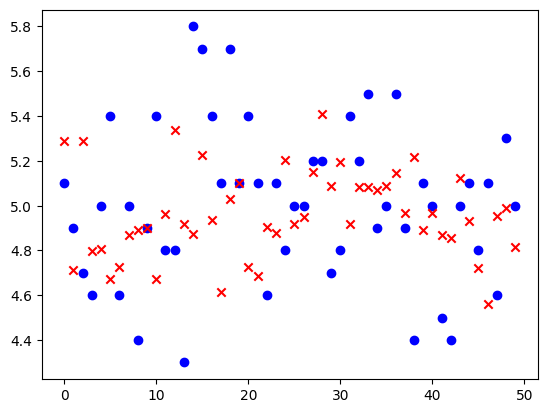

Epoch 3902/10000, Discriminator Loss: 1.3878977298736572, Generator Loss: 0.6976039409637451
Epoch 3903/10000, Discriminator Loss: 1.3880462646484375, Generator Loss: 0.6974428296089172
Epoch 3904/10000, Discriminator Loss: 1.388001799583435, Generator Loss: 0.6974579095840454
Epoch 3905/10000, Discriminator Loss: 1.3879841566085815, Generator Loss: 0.697447657585144
Epoch 3906/10000, Discriminator Loss: 1.3882964849472046, Generator Loss: 0.6971046328544617
Epoch 3907/10000, Discriminator Loss: 1.3882811069488525, Generator Loss: 0.6970769762992859
Epoch 3908/10000, Discriminator Loss: 1.3882899284362793, Generator Loss: 0.6970312595367432
Epoch 3909/10000, Discriminator Loss: 1.3884289264678955, Generator Loss: 0.6968419551849365
Epoch 3910/10000, Discriminator Loss: 1.3886799812316895, Generator Loss: 0.6965377330780029
Epoch 3911/10000, Discriminator Loss: 1.3887579441070557, Generator Loss: 0.6964053511619568
Epoch 3912/10000, Discriminator Loss: 1.388716220855713, Generator Loss:

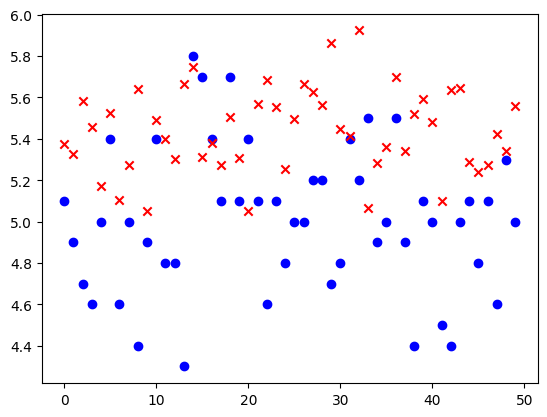

Epoch 4002/10000, Discriminator Loss: 1.387655258178711, Generator Loss: 0.6928817629814148
Epoch 4003/10000, Discriminator Loss: 1.387605905532837, Generator Loss: 0.692878007888794
Epoch 4004/10000, Discriminator Loss: 1.3875890970230103, Generator Loss: 0.6928389072418213
Epoch 4005/10000, Discriminator Loss: 1.3877507448196411, Generator Loss: 0.6926299333572388
Epoch 4006/10000, Discriminator Loss: 1.3876110315322876, Generator Loss: 0.6927245855331421
Epoch 4007/10000, Discriminator Loss: 1.3877475261688232, Generator Loss: 0.6925542950630188
Epoch 4008/10000, Discriminator Loss: 1.3876118659973145, Generator Loss: 0.692656934261322
Epoch 4009/10000, Discriminator Loss: 1.3875313997268677, Generator Loss: 0.6927119493484497
Epoch 4010/10000, Discriminator Loss: 1.3875184059143066, Generator Loss: 0.6926879286766052
Epoch 4011/10000, Discriminator Loss: 1.3877201080322266, Generator Loss: 0.6924504041671753
Epoch 4012/10000, Discriminator Loss: 1.387537956237793, Generator Loss: 0

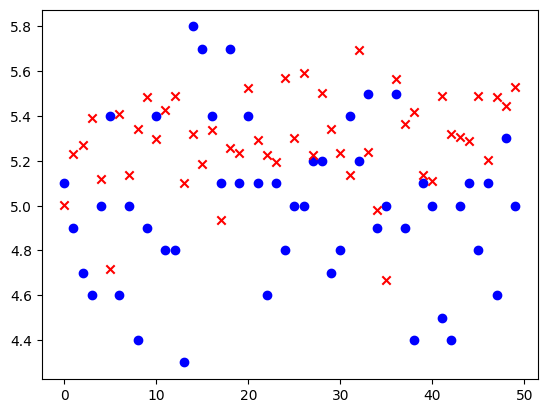

Epoch 4102/10000, Discriminator Loss: 1.3887577056884766, Generator Loss: 0.6888231039047241
Epoch 4103/10000, Discriminator Loss: 1.3890272378921509, Generator Loss: 0.6886526346206665
Epoch 4104/10000, Discriminator Loss: 1.38956880569458, Generator Loss: 0.6882122755050659
Epoch 4105/10000, Discriminator Loss: 1.389610767364502, Generator Loss: 0.6882795691490173
Epoch 4106/10000, Discriminator Loss: 1.3899935483932495, Generator Loss: 0.6880127787590027
Epoch 4107/10000, Discriminator Loss: 1.3900353908538818, Generator Loss: 0.6880823373794556
Epoch 4108/10000, Discriminator Loss: 1.3903539180755615, Generator Loss: 0.6878821849822998
Epoch 4109/10000, Discriminator Loss: 1.3901052474975586, Generator Loss: 0.6882376670837402
Epoch 4110/10000, Discriminator Loss: 1.3905160427093506, Generator Loss: 0.6879457831382751
Epoch 4111/10000, Discriminator Loss: 1.3906810283660889, Generator Loss: 0.6879006028175354
Epoch 4112/10000, Discriminator Loss: 1.3908278942108154, Generator Loss:

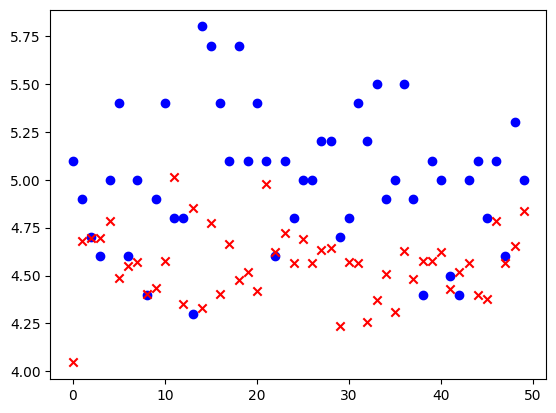

Epoch 4202/10000, Discriminator Loss: 1.3869049549102783, Generator Loss: 0.694560706615448
Epoch 4203/10000, Discriminator Loss: 1.3868379592895508, Generator Loss: 0.6945891380310059
Epoch 4204/10000, Discriminator Loss: 1.386921763420105, Generator Loss: 0.6944673657417297
Epoch 4205/10000, Discriminator Loss: 1.386884093284607, Generator Loss: 0.6944928169250488
Epoch 4206/10000, Discriminator Loss: 1.3867690563201904, Generator Loss: 0.694588840007782
Epoch 4207/10000, Discriminator Loss: 1.3868074417114258, Generator Loss: 0.6945334076881409
Epoch 4208/10000, Discriminator Loss: 1.386749029159546, Generator Loss: 0.6945684552192688
Epoch 4209/10000, Discriminator Loss: 1.3868021965026855, Generator Loss: 0.6945034861564636
Epoch 4210/10000, Discriminator Loss: 1.3866610527038574, Generator Loss: 0.69463711977005
Epoch 4211/10000, Discriminator Loss: 1.386786699295044, Generator Loss: 0.6944975852966309
Epoch 4212/10000, Discriminator Loss: 1.3869516849517822, Generator Loss: 0.69

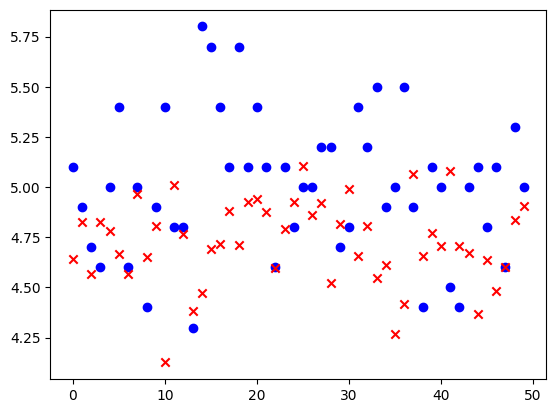

Epoch 4302/10000, Discriminator Loss: 1.3869822025299072, Generator Loss: 0.6910153031349182
Epoch 4303/10000, Discriminator Loss: 1.3869903087615967, Generator Loss: 0.6909119486808777
Epoch 4304/10000, Discriminator Loss: 1.3869041204452515, Generator Loss: 0.690925121307373
Epoch 4305/10000, Discriminator Loss: 1.3867632150650024, Generator Loss: 0.6909376382827759
Epoch 4306/10000, Discriminator Loss: 1.3869452476501465, Generator Loss: 0.6906596422195435
Epoch 4307/10000, Discriminator Loss: 1.3867229223251343, Generator Loss: 0.6907848119735718
Epoch 4308/10000, Discriminator Loss: 1.3867175579071045, Generator Loss: 0.6906588077545166
Epoch 4309/10000, Discriminator Loss: 1.3866205215454102, Generator Loss: 0.690625786781311
Epoch 4310/10000, Discriminator Loss: 1.3867466449737549, Generator Loss: 0.6903861165046692
Epoch 4311/10000, Discriminator Loss: 1.3865842819213867, Generator Loss: 0.6904310584068298
Epoch 4312/10000, Discriminator Loss: 1.386630654335022, Generator Loss:

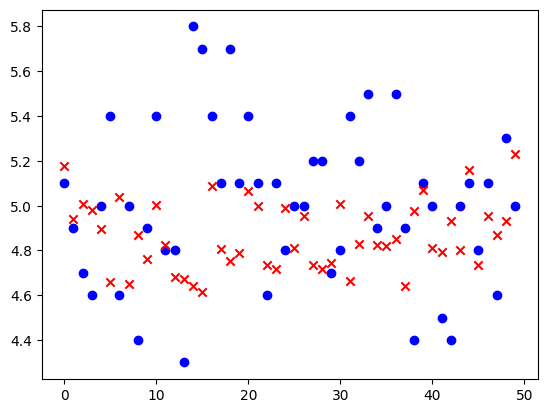

Epoch 4402/10000, Discriminator Loss: 1.387797236442566, Generator Loss: 0.6982769966125488
Epoch 4403/10000, Discriminator Loss: 1.3879611492156982, Generator Loss: 0.6980692148208618
Epoch 4404/10000, Discriminator Loss: 1.3879481554031372, Generator Loss: 0.6980352997779846
Epoch 4405/10000, Discriminator Loss: 1.3880653381347656, Generator Loss: 0.697861909866333
Epoch 4406/10000, Discriminator Loss: 1.3881430625915527, Generator Loss: 0.6977212429046631
Epoch 4407/10000, Discriminator Loss: 1.3882026672363281, Generator Loss: 0.6975935101509094
Epoch 4408/10000, Discriminator Loss: 1.3882135152816772, Generator Loss: 0.6975076794624329
Epoch 4409/10000, Discriminator Loss: 1.3882943391799927, Generator Loss: 0.6973443627357483
Epoch 4410/10000, Discriminator Loss: 1.3884228467941284, Generator Loss: 0.6971263289451599
Epoch 4411/10000, Discriminator Loss: 1.3883955478668213, Generator Loss: 0.6970577836036682
Epoch 4412/10000, Discriminator Loss: 1.3885600566864014, Generator Loss

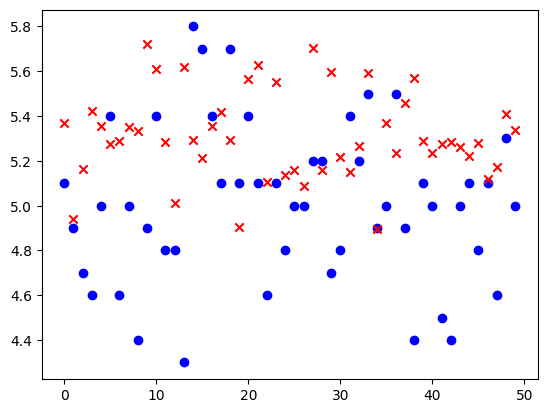

Epoch 4502/10000, Discriminator Loss: 1.3882839679718018, Generator Loss: 0.6883563995361328
Epoch 4503/10000, Discriminator Loss: 1.38822340965271, Generator Loss: 0.6884124875068665
Epoch 4504/10000, Discriminator Loss: 1.388254165649414, Generator Loss: 0.6883587837219238
Epoch 4505/10000, Discriminator Loss: 1.3880035877227783, Generator Loss: 0.6885624527931213
Epoch 4506/10000, Discriminator Loss: 1.3882404565811157, Generator Loss: 0.6882637739181519
Epoch 4507/10000, Discriminator Loss: 1.3880704641342163, Generator Loss: 0.6883791089057922
Epoch 4508/10000, Discriminator Loss: 1.388120412826538, Generator Loss: 0.688256025314331
Epoch 4509/10000, Discriminator Loss: 1.3881174325942993, Generator Loss: 0.6882095336914062
Epoch 4510/10000, Discriminator Loss: 1.3877685070037842, Generator Loss: 0.688506543636322
Epoch 4511/10000, Discriminator Loss: 1.3879241943359375, Generator Loss: 0.6882756948471069
Epoch 4512/10000, Discriminator Loss: 1.3878103494644165, Generator Loss: 0.

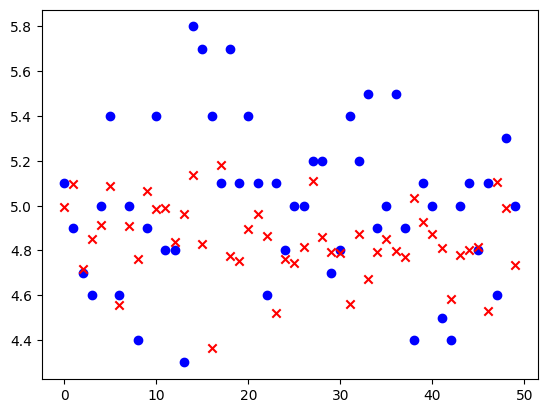

Epoch 4602/10000, Discriminator Loss: 1.3866114616394043, Generator Loss: 0.6910614967346191
Epoch 4603/10000, Discriminator Loss: 1.3866043090820312, Generator Loss: 0.6910437941551208
Epoch 4604/10000, Discriminator Loss: 1.3865878582000732, Generator Loss: 0.6910383701324463
Epoch 4605/10000, Discriminator Loss: 1.3866653442382812, Generator Loss: 0.6909446120262146
Epoch 4606/10000, Discriminator Loss: 1.386738657951355, Generator Loss: 0.6908571720123291
Epoch 4607/10000, Discriminator Loss: 1.3867270946502686, Generator Loss: 0.6908636689186096
Epoch 4608/10000, Discriminator Loss: 1.3867608308792114, Generator Loss: 0.6908299922943115
Epoch 4609/10000, Discriminator Loss: 1.3867418766021729, Generator Loss: 0.6908508539199829
Epoch 4610/10000, Discriminator Loss: 1.38670015335083, Generator Loss: 0.6908926963806152
Epoch 4611/10000, Discriminator Loss: 1.3867924213409424, Generator Loss: 0.6907989978790283
Epoch 4612/10000, Discriminator Loss: 1.3868896961212158, Generator Loss:

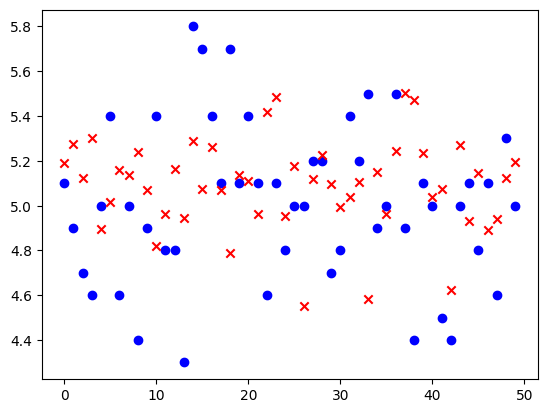

Epoch 4702/10000, Discriminator Loss: 1.386850118637085, Generator Loss: 0.6958496570587158
Epoch 4703/10000, Discriminator Loss: 1.3868157863616943, Generator Loss: 0.6958720684051514
Epoch 4704/10000, Discriminator Loss: 1.3868730068206787, Generator Loss: 0.6957994103431702
Epoch 4705/10000, Discriminator Loss: 1.3868420124053955, Generator Loss: 0.6958143711090088
Epoch 4706/10000, Discriminator Loss: 1.3868179321289062, Generator Loss: 0.6958209872245789
Epoch 4707/10000, Discriminator Loss: 1.3868355751037598, Generator Loss: 0.6957838535308838
Epoch 4708/10000, Discriminator Loss: 1.3868117332458496, Generator Loss: 0.6957864165306091
Epoch 4709/10000, Discriminator Loss: 1.386803150177002, Generator Loss: 0.6957716345787048
Epoch 4710/10000, Discriminator Loss: 1.3868473768234253, Generator Loss: 0.6956999897956848
Epoch 4711/10000, Discriminator Loss: 1.386815071105957, Generator Loss: 0.6957026720046997
Epoch 4712/10000, Discriminator Loss: 1.3868060111999512, Generator Loss:

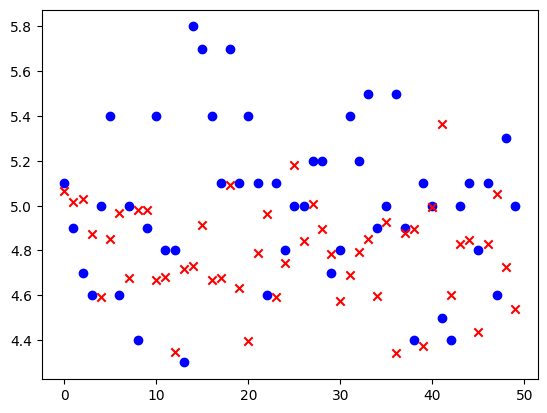

Epoch 4802/10000, Discriminator Loss: 1.385820984840393, Generator Loss: 0.6907601356506348
Epoch 4803/10000, Discriminator Loss: 1.3858346939086914, Generator Loss: 0.6907267570495605
Epoch 4804/10000, Discriminator Loss: 1.3858981132507324, Generator Loss: 0.6906479001045227
Epoch 4805/10000, Discriminator Loss: 1.385857343673706, Generator Loss: 0.6906788349151611
Epoch 4806/10000, Discriminator Loss: 1.385869026184082, Generator Loss: 0.6906601190567017
Epoch 4807/10000, Discriminator Loss: 1.3858141899108887, Generator Loss: 0.6907119750976562
Epoch 4808/10000, Discriminator Loss: 1.38592529296875, Generator Loss: 0.6906025409698486
Epoch 4809/10000, Discriminator Loss: 1.3858826160430908, Generator Loss: 0.6906528472900391
Epoch 4810/10000, Discriminator Loss: 1.3859020471572876, Generator Loss: 0.6906449794769287
Epoch 4811/10000, Discriminator Loss: 1.3859589099884033, Generator Loss: 0.6906038522720337
Epoch 4812/10000, Discriminator Loss: 1.3858940601348877, Generator Loss: 0

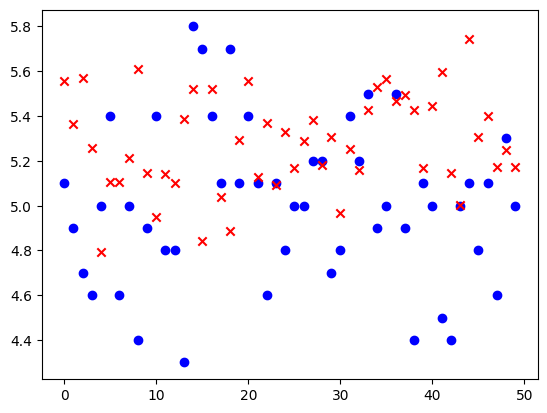

Epoch 4902/10000, Discriminator Loss: 1.3868591785430908, Generator Loss: 0.6977460980415344
Epoch 4903/10000, Discriminator Loss: 1.3868772983551025, Generator Loss: 0.697792112827301
Epoch 4904/10000, Discriminator Loss: 1.3868553638458252, Generator Loss: 0.6978762149810791
Epoch 4905/10000, Discriminator Loss: 1.3868544101715088, Generator Loss: 0.6979342103004456
Epoch 4906/10000, Discriminator Loss: 1.3868446350097656, Generator Loss: 0.697998583316803
Epoch 4907/10000, Discriminator Loss: 1.3868153095245361, Generator Loss: 0.6980797052383423
Epoch 4908/10000, Discriminator Loss: 1.3868420124053955, Generator Loss: 0.6980994939804077
Epoch 4909/10000, Discriminator Loss: 1.3868720531463623, Generator Loss: 0.6981073021888733
Epoch 4910/10000, Discriminator Loss: 1.3868834972381592, Generator Loss: 0.6981320977210999
Epoch 4911/10000, Discriminator Loss: 1.3867794275283813, Generator Loss: 0.6982729434967041
Epoch 4912/10000, Discriminator Loss: 1.386875867843628, Generator Loss:

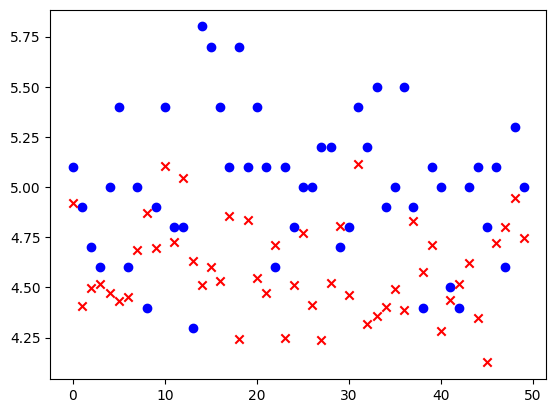

Epoch 5002/10000, Discriminator Loss: 1.3859901428222656, Generator Loss: 0.6903010606765747
Epoch 5003/10000, Discriminator Loss: 1.3859151601791382, Generator Loss: 0.6902191042900085
Epoch 5004/10000, Discriminator Loss: 1.3858411312103271, Generator Loss: 0.6901264190673828
Epoch 5005/10000, Discriminator Loss: 1.3857046365737915, Generator Loss: 0.6900890469551086
Epoch 5006/10000, Discriminator Loss: 1.3856558799743652, Generator Loss: 0.689948320388794
Epoch 5007/10000, Discriminator Loss: 1.3856627941131592, Generator Loss: 0.689749002456665
Epoch 5008/10000, Discriminator Loss: 1.3854604959487915, Generator Loss: 0.689759373664856
Epoch 5009/10000, Discriminator Loss: 1.385385274887085, Generator Loss: 0.6896194219589233
Epoch 5010/10000, Discriminator Loss: 1.385329246520996, Generator Loss: 0.6894634366035461
Epoch 5011/10000, Discriminator Loss: 1.3851518630981445, Generator Loss: 0.6894435882568359
Epoch 5012/10000, Discriminator Loss: 1.385115146636963, Generator Loss: 0.

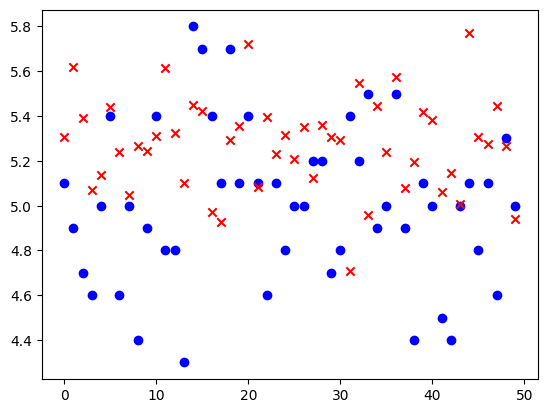

Epoch 5102/10000, Discriminator Loss: 1.3855561017990112, Generator Loss: 0.7075966000556946
Epoch 5103/10000, Discriminator Loss: 1.3858129978179932, Generator Loss: 0.7072445750236511
Epoch 5104/10000, Discriminator Loss: 1.3861082792282104, Generator Loss: 0.7068390846252441
Epoch 5105/10000, Discriminator Loss: 1.3865635395050049, Generator Loss: 0.7062506675720215
Epoch 5106/10000, Discriminator Loss: 1.386961817741394, Generator Loss: 0.7057031393051147
Epoch 5107/10000, Discriminator Loss: 1.386972427368164, Generator Loss: 0.7055482268333435
Epoch 5108/10000, Discriminator Loss: 1.3869402408599854, Generator Loss: 0.7054230570793152
Epoch 5109/10000, Discriminator Loss: 1.3874863386154175, Generator Loss: 0.704692542552948
Epoch 5110/10000, Discriminator Loss: 1.3876899480819702, Generator Loss: 0.7043070197105408
Epoch 5111/10000, Discriminator Loss: 1.3881711959838867, Generator Loss: 0.7036309838294983
Epoch 5112/10000, Discriminator Loss: 1.3883894681930542, Generator Loss:

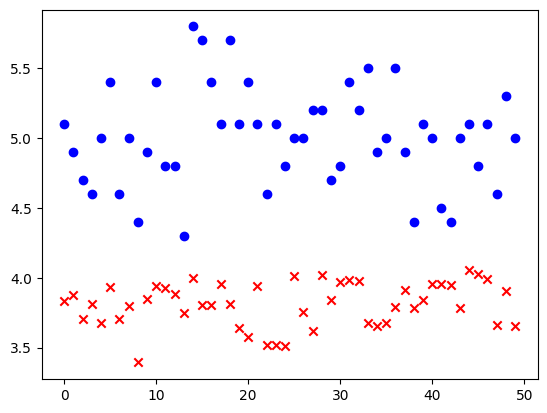

Epoch 5202/10000, Discriminator Loss: 1.3893358707427979, Generator Loss: 0.6908743977546692
Epoch 5203/10000, Discriminator Loss: 1.3890886306762695, Generator Loss: 0.6908136010169983
Epoch 5204/10000, Discriminator Loss: 1.3874843120574951, Generator Loss: 0.6921169757843018
Epoch 5205/10000, Discriminator Loss: 1.387214183807373, Generator Loss: 0.6920964121818542
Epoch 5206/10000, Discriminator Loss: 1.3869693279266357, Generator Loss: 0.6918530464172363
Epoch 5207/10000, Discriminator Loss: 1.3865091800689697, Generator Loss: 0.6917684078216553
Epoch 5208/10000, Discriminator Loss: 1.3869030475616455, Generator Loss: 0.6907534003257751
Epoch 5209/10000, Discriminator Loss: 1.3869407176971436, Generator Loss: 0.6898754239082336
Epoch 5210/10000, Discriminator Loss: 1.3869411945343018, Generator Loss: 0.6892046928405762
Epoch 5211/10000, Discriminator Loss: 1.386122703552246, Generator Loss: 0.6895030736923218
Epoch 5212/10000, Discriminator Loss: 1.3875060081481934, Generator Loss

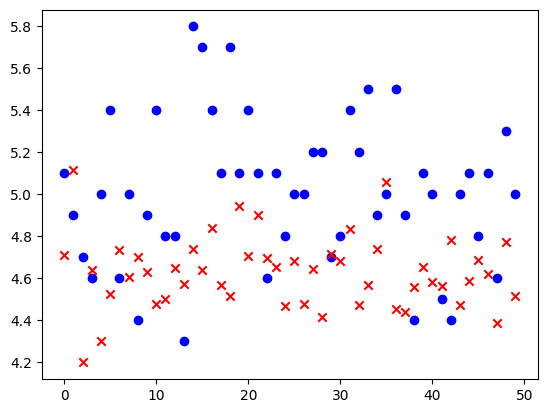

Epoch 5302/10000, Discriminator Loss: 1.3883512020111084, Generator Loss: 0.6972825527191162
Epoch 5303/10000, Discriminator Loss: 1.3883639574050903, Generator Loss: 0.6971912384033203
Epoch 5304/10000, Discriminator Loss: 1.3884369134902954, Generator Loss: 0.6970287561416626
Epoch 5305/10000, Discriminator Loss: 1.3886377811431885, Generator Loss: 0.6967266201972961
Epoch 5306/10000, Discriminator Loss: 1.388747215270996, Generator Loss: 0.6965093016624451
Epoch 5307/10000, Discriminator Loss: 1.38894522190094, Generator Loss: 0.696181058883667
Epoch 5308/10000, Discriminator Loss: 1.3891198635101318, Generator Loss: 0.6958321928977966
Epoch 5309/10000, Discriminator Loss: 1.3892395496368408, Generator Loss: 0.695492684841156
Epoch 5310/10000, Discriminator Loss: 1.3891644477844238, Generator Loss: 0.6953577995300293
Epoch 5311/10000, Discriminator Loss: 1.3891247510910034, Generator Loss: 0.6952440738677979
Epoch 5312/10000, Discriminator Loss: 1.389171838760376, Generator Loss: 0.

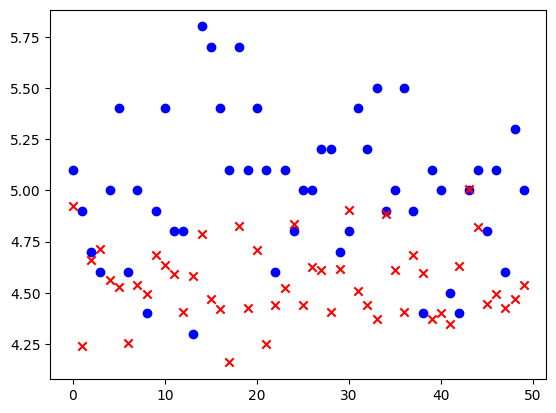

Epoch 5402/10000, Discriminator Loss: 1.3875439167022705, Generator Loss: 0.6885451674461365
Epoch 5403/10000, Discriminator Loss: 1.3873976469039917, Generator Loss: 0.688670814037323
Epoch 5404/10000, Discriminator Loss: 1.3872774839401245, Generator Loss: 0.6887341141700745
Epoch 5405/10000, Discriminator Loss: 1.3871604204177856, Generator Loss: 0.6888428330421448
Epoch 5406/10000, Discriminator Loss: 1.387324333190918, Generator Loss: 0.6886285543441772
Epoch 5407/10000, Discriminator Loss: 1.3871726989746094, Generator Loss: 0.6887362599372864
Epoch 5408/10000, Discriminator Loss: 1.3871996402740479, Generator Loss: 0.6886535882949829
Epoch 5409/10000, Discriminator Loss: 1.3869197368621826, Generator Loss: 0.6889509558677673
Epoch 5410/10000, Discriminator Loss: 1.3871448040008545, Generator Loss: 0.6886463761329651
Epoch 5411/10000, Discriminator Loss: 1.3872252702713013, Generator Loss: 0.6885073781013489
Epoch 5412/10000, Discriminator Loss: 1.3872942924499512, Generator Loss

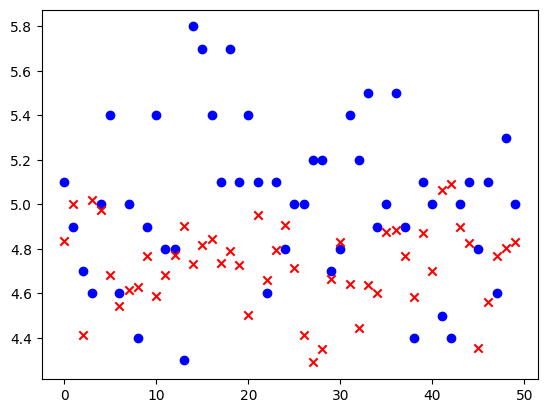

Epoch 5502/10000, Discriminator Loss: 1.386711597442627, Generator Loss: 0.6899216175079346
Epoch 5503/10000, Discriminator Loss: 1.3867697715759277, Generator Loss: 0.6898026466369629
Epoch 5504/10000, Discriminator Loss: 1.3867547512054443, Generator Loss: 0.6897582411766052
Epoch 5505/10000, Discriminator Loss: 1.386641502380371, Generator Loss: 0.6898155808448792
Epoch 5506/10000, Discriminator Loss: 1.3867157697677612, Generator Loss: 0.689683198928833
Epoch 5507/10000, Discriminator Loss: 1.386734127998352, Generator Loss: 0.6896002292633057
Epoch 5508/10000, Discriminator Loss: 1.3864293098449707, Generator Loss: 0.6898318529129028
Epoch 5509/10000, Discriminator Loss: 1.3865880966186523, Generator Loss: 0.6896133422851562
Epoch 5510/10000, Discriminator Loss: 1.3866183757781982, Generator Loss: 0.6895269751548767
Epoch 5511/10000, Discriminator Loss: 1.386622428894043, Generator Loss: 0.6894636750221252
Epoch 5512/10000, Discriminator Loss: 1.3865677118301392, Generator Loss: 0

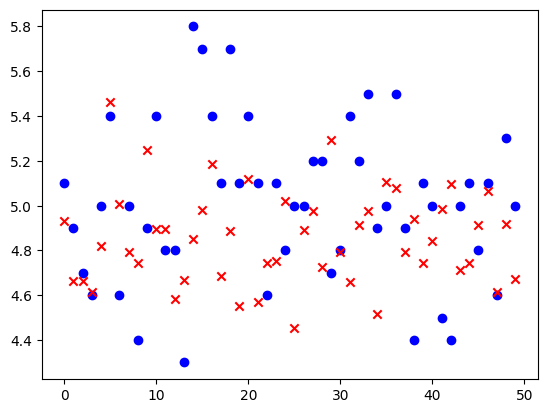

Epoch 5602/10000, Discriminator Loss: 1.3865694999694824, Generator Loss: 0.6898748874664307
Epoch 5603/10000, Discriminator Loss: 1.386513590812683, Generator Loss: 0.6899533867835999
Epoch 5604/10000, Discriminator Loss: 1.3865185976028442, Generator Loss: 0.689972996711731
Epoch 5605/10000, Discriminator Loss: 1.3865045309066772, Generator Loss: 0.690014660358429
Epoch 5606/10000, Discriminator Loss: 1.386494517326355, Generator Loss: 0.6900535821914673
Epoch 5607/10000, Discriminator Loss: 1.3864963054656982, Generator Loss: 0.6900820136070251
Epoch 5608/10000, Discriminator Loss: 1.3865141868591309, Generator Loss: 0.6900972723960876
Epoch 5609/10000, Discriminator Loss: 1.3864911794662476, Generator Loss: 0.6901553273200989
Epoch 5610/10000, Discriminator Loss: 1.3864469528198242, Generator Loss: 0.6902323365211487
Epoch 5611/10000, Discriminator Loss: 1.3864471912384033, Generator Loss: 0.6902678608894348
Epoch 5612/10000, Discriminator Loss: 1.386456847190857, Generator Loss: 0

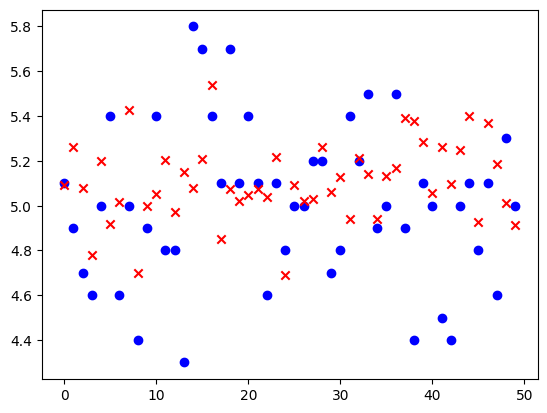

Epoch 5702/10000, Discriminator Loss: 1.3866498470306396, Generator Loss: 0.6944476962089539
Epoch 5703/10000, Discriminator Loss: 1.3866362571716309, Generator Loss: 0.6944921016693115
Epoch 5704/10000, Discriminator Loss: 1.386637806892395, Generator Loss: 0.6945195198059082
Epoch 5705/10000, Discriminator Loss: 1.3866393566131592, Generator Loss: 0.694546103477478
Epoch 5706/10000, Discriminator Loss: 1.3866411447525024, Generator Loss: 0.6945713758468628
Epoch 5707/10000, Discriminator Loss: 1.3866384029388428, Generator Loss: 0.69460129737854
Epoch 5708/10000, Discriminator Loss: 1.3866207599639893, Generator Loss: 0.6946449279785156
Epoch 5709/10000, Discriminator Loss: 1.3866469860076904, Generator Loss: 0.6946440935134888
Epoch 5710/10000, Discriminator Loss: 1.3866400718688965, Generator Loss: 0.6946752071380615
Epoch 5711/10000, Discriminator Loss: 1.3866446018218994, Generator Loss: 0.6946937441825867
Epoch 5712/10000, Discriminator Loss: 1.3866159915924072, Generator Loss: 

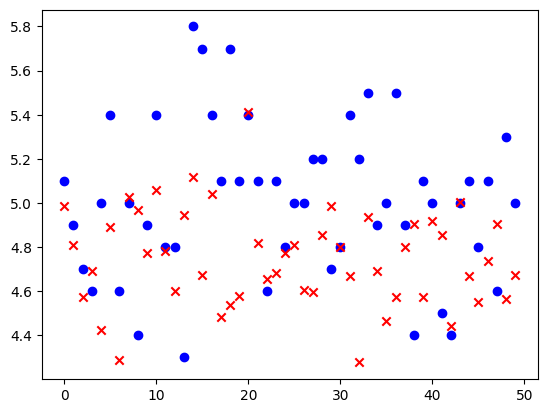

Epoch 5802/10000, Discriminator Loss: 1.3863837718963623, Generator Loss: 0.6926504373550415
Epoch 5803/10000, Discriminator Loss: 1.3863525390625, Generator Loss: 0.6926345229148865
Epoch 5804/10000, Discriminator Loss: 1.386511206626892, Generator Loss: 0.6924257874488831
Epoch 5805/10000, Discriminator Loss: 1.3865301609039307, Generator Loss: 0.6923612952232361
Epoch 5806/10000, Discriminator Loss: 1.3863105773925781, Generator Loss: 0.6925298571586609
Epoch 5807/10000, Discriminator Loss: 1.386441707611084, Generator Loss: 0.6923432350158691
Epoch 5808/10000, Discriminator Loss: 1.3865382671356201, Generator Loss: 0.6921976208686829
Epoch 5809/10000, Discriminator Loss: 1.3864085674285889, Generator Loss: 0.6922743320465088
Epoch 5810/10000, Discriminator Loss: 1.3863177299499512, Generator Loss: 0.6923002004623413
Epoch 5811/10000, Discriminator Loss: 1.3864760398864746, Generator Loss: 0.6920799016952515
Epoch 5812/10000, Discriminator Loss: 1.3864716291427612, Generator Loss: 0

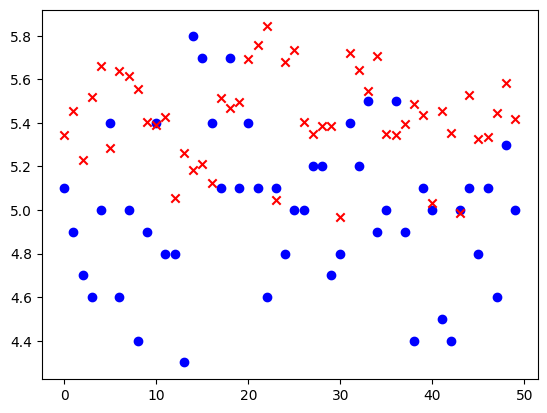

Epoch 5902/10000, Discriminator Loss: 1.3862900733947754, Generator Loss: 0.6953037977218628
Epoch 5903/10000, Discriminator Loss: 1.3862738609313965, Generator Loss: 0.6954174041748047
Epoch 5904/10000, Discriminator Loss: 1.3862290382385254, Generator Loss: 0.6955501437187195
Epoch 5905/10000, Discriminator Loss: 1.3862254619598389, Generator Loss: 0.6956443786621094
Epoch 5906/10000, Discriminator Loss: 1.3862031698226929, Generator Loss: 0.6957489252090454
Epoch 5907/10000, Discriminator Loss: 1.3861660957336426, Generator Loss: 0.6958696842193604
Epoch 5908/10000, Discriminator Loss: 1.3861234188079834, Generator Loss: 0.6959848999977112
Epoch 5909/10000, Discriminator Loss: 1.3860750198364258, Generator Loss: 0.6961165070533752
Epoch 5910/10000, Discriminator Loss: 1.3860942125320435, Generator Loss: 0.6961683034896851
Epoch 5911/10000, Discriminator Loss: 1.3860394954681396, Generator Loss: 0.6962888836860657
Epoch 5912/10000, Discriminator Loss: 1.3860276937484741, Generator Lo

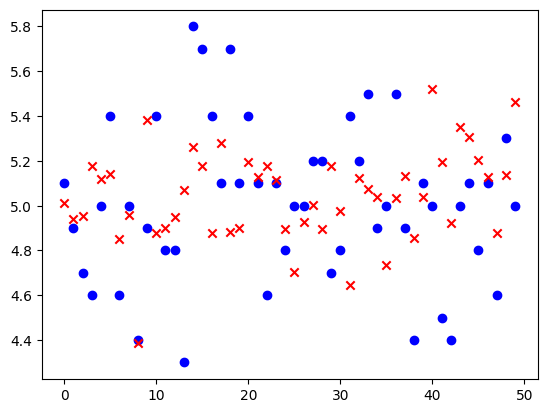

Epoch 6002/10000, Discriminator Loss: 1.3863203525543213, Generator Loss: 0.6890676617622375
Epoch 6003/10000, Discriminator Loss: 1.3862777948379517, Generator Loss: 0.6891276836395264
Epoch 6004/10000, Discriminator Loss: 1.3862125873565674, Generator Loss: 0.6892240047454834
Epoch 6005/10000, Discriminator Loss: 1.3861750364303589, Generator Loss: 0.6892940998077393
Epoch 6006/10000, Discriminator Loss: 1.3861799240112305, Generator Loss: 0.6893326044082642
Epoch 6007/10000, Discriminator Loss: 1.3861579895019531, Generator Loss: 0.6894059181213379
Epoch 6008/10000, Discriminator Loss: 1.3860929012298584, Generator Loss: 0.6895334720611572
Epoch 6009/10000, Discriminator Loss: 1.3861186504364014, Generator Loss: 0.6895816922187805
Epoch 6010/10000, Discriminator Loss: 1.3860633373260498, Generator Loss: 0.6897140741348267
Epoch 6011/10000, Discriminator Loss: 1.386033535003662, Generator Loss: 0.6898252964019775
Epoch 6012/10000, Discriminator Loss: 1.3860554695129395, Generator Los

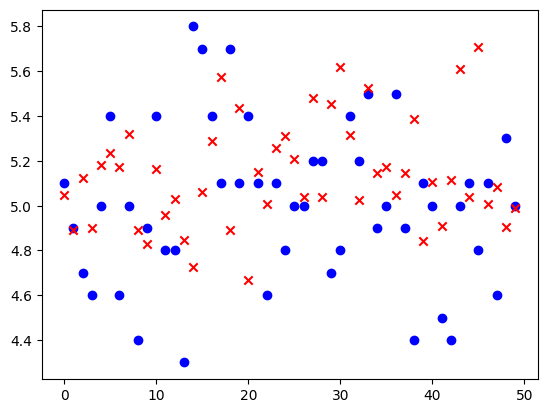

Epoch 6102/10000, Discriminator Loss: 1.3855178356170654, Generator Loss: 0.6995166540145874
Epoch 6103/10000, Discriminator Loss: 1.3855600357055664, Generator Loss: 0.6995152831077576
Epoch 6104/10000, Discriminator Loss: 1.3855946063995361, Generator Loss: 0.6995192766189575
Epoch 6105/10000, Discriminator Loss: 1.3856639862060547, Generator Loss: 0.6994892358779907
Epoch 6106/10000, Discriminator Loss: 1.3856920003890991, Generator Loss: 0.6994979977607727
Epoch 6107/10000, Discriminator Loss: 1.385758638381958, Generator Loss: 0.6994692087173462
Epoch 6108/10000, Discriminator Loss: 1.3858160972595215, Generator Loss: 0.6994487047195435
Epoch 6109/10000, Discriminator Loss: 1.385876178741455, Generator Loss: 0.6994244456291199
Epoch 6110/10000, Discriminator Loss: 1.3859117031097412, Generator Loss: 0.6994220018386841
Epoch 6111/10000, Discriminator Loss: 1.3860162496566772, Generator Loss: 0.6993522644042969
Epoch 6112/10000, Discriminator Loss: 1.386096477508545, Generator Loss:

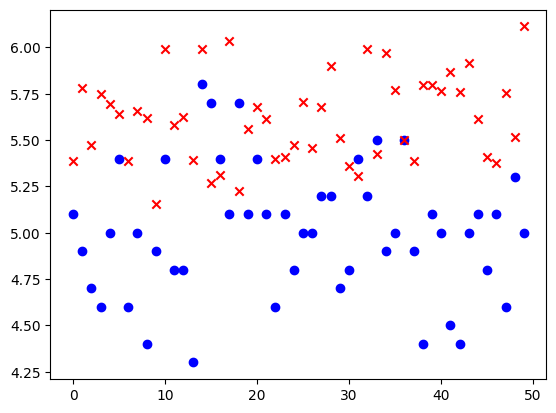

Epoch 6202/10000, Discriminator Loss: 1.3847817182540894, Generator Loss: 0.6940702795982361
Epoch 6203/10000, Discriminator Loss: 1.3842887878417969, Generator Loss: 0.6944718956947327
Epoch 6204/10000, Discriminator Loss: 1.3838517665863037, Generator Loss: 0.6946780681610107
Epoch 6205/10000, Discriminator Loss: 1.3822972774505615, Generator Loss: 0.6958088874816895
Epoch 6206/10000, Discriminator Loss: 1.3816334009170532, Generator Loss: 0.6959587931632996
Epoch 6207/10000, Discriminator Loss: 1.380829095840454, Generator Loss: 0.6960887312889099
Epoch 6208/10000, Discriminator Loss: 1.379607915878296, Generator Loss: 0.6966334581375122
Epoch 6209/10000, Discriminator Loss: 1.3787298202514648, Generator Loss: 0.6969441175460815
Epoch 6210/10000, Discriminator Loss: 1.3782215118408203, Generator Loss: 0.6970070004463196
Epoch 6211/10000, Discriminator Loss: 1.3774397373199463, Generator Loss: 0.6974247097969055
Epoch 6212/10000, Discriminator Loss: 1.3773446083068848, Generator Loss

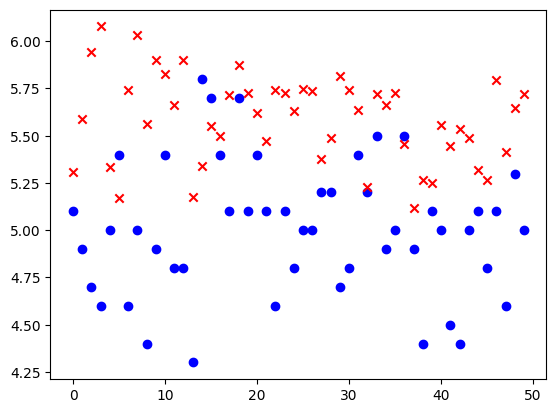

Epoch 6302/10000, Discriminator Loss: 1.3793411254882812, Generator Loss: 0.7095028162002563
Epoch 6303/10000, Discriminator Loss: 1.37882399559021, Generator Loss: 0.710070788860321
Epoch 6304/10000, Discriminator Loss: 1.377995491027832, Generator Loss: 0.7109527587890625
Epoch 6305/10000, Discriminator Loss: 1.3775110244750977, Generator Loss: 0.7114596366882324
Epoch 6306/10000, Discriminator Loss: 1.3770196437835693, Generator Loss: 0.7119572162628174
Epoch 6307/10000, Discriminator Loss: 1.3766759634017944, Generator Loss: 0.7123132348060608
Epoch 6308/10000, Discriminator Loss: 1.3762166500091553, Generator Loss: 0.7127781510353088
Epoch 6309/10000, Discriminator Loss: 1.3758158683776855, Generator Loss: 0.7130683660507202
Epoch 6310/10000, Discriminator Loss: 1.3756303787231445, Generator Loss: 0.7131580114364624
Epoch 6311/10000, Discriminator Loss: 1.375483751296997, Generator Loss: 0.7131650447845459
Epoch 6312/10000, Discriminator Loss: 1.375276803970337, Generator Loss: 0.

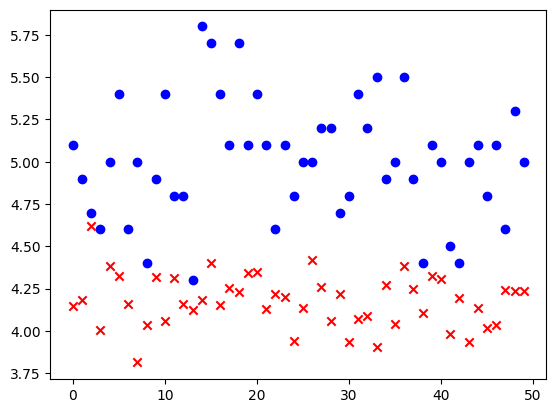

Epoch 6402/10000, Discriminator Loss: 1.3835861682891846, Generator Loss: 0.6922024488449097
Epoch 6403/10000, Discriminator Loss: 1.383364200592041, Generator Loss: 0.6925646066665649
Epoch 6404/10000, Discriminator Loss: 1.3834559917449951, Generator Loss: 0.6926043629646301
Epoch 6405/10000, Discriminator Loss: 1.383377194404602, Generator Loss: 0.6928120255470276
Epoch 6406/10000, Discriminator Loss: 1.3835031986236572, Generator Loss: 0.6928059458732605
Epoch 6407/10000, Discriminator Loss: 1.3838963508605957, Generator Loss: 0.6925237774848938
Epoch 6408/10000, Discriminator Loss: 1.3844243288040161, Generator Loss: 0.6920950412750244
Epoch 6409/10000, Discriminator Loss: 1.385335922241211, Generator Loss: 0.6912779808044434
Epoch 6410/10000, Discriminator Loss: 1.3862800598144531, Generator Loss: 0.6904032826423645
Epoch 6411/10000, Discriminator Loss: 1.3869531154632568, Generator Loss: 0.689780592918396
Epoch 6412/10000, Discriminator Loss: 1.3878083229064941, Generator Loss: 

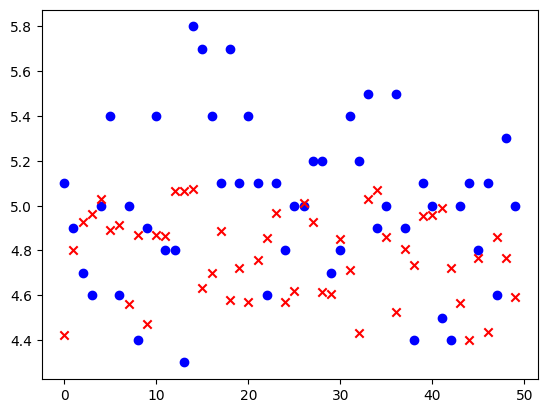

Epoch 6502/10000, Discriminator Loss: 1.3859038352966309, Generator Loss: 0.6943079233169556
Epoch 6503/10000, Discriminator Loss: 1.3859626054763794, Generator Loss: 0.694271445274353
Epoch 6504/10000, Discriminator Loss: 1.3858888149261475, Generator Loss: 0.6943622827529907
Epoch 6505/10000, Discriminator Loss: 1.385960578918457, Generator Loss: 0.6943029165267944
Epoch 6506/10000, Discriminator Loss: 1.3859432935714722, Generator Loss: 0.6943286061286926
Epoch 6507/10000, Discriminator Loss: 1.385967493057251, Generator Loss: 0.6943099498748779
Epoch 6508/10000, Discriminator Loss: 1.3859992027282715, Generator Loss: 0.6942796111106873
Epoch 6509/10000, Discriminator Loss: 1.3859601020812988, Generator Loss: 0.6943166255950928
Epoch 6510/10000, Discriminator Loss: 1.3860481977462769, Generator Loss: 0.6942212581634521
Epoch 6511/10000, Discriminator Loss: 1.3860753774642944, Generator Loss: 0.6941885352134705
Epoch 6512/10000, Discriminator Loss: 1.3861010074615479, Generator Loss:

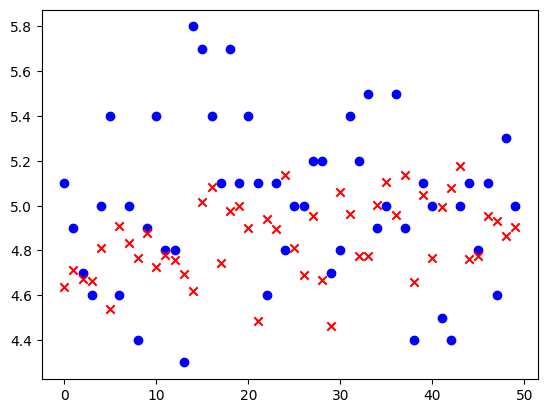

Epoch 6602/10000, Discriminator Loss: 1.3871209621429443, Generator Loss: 0.6894830465316772
Epoch 6603/10000, Discriminator Loss: 1.3871185779571533, Generator Loss: 0.689465343952179
Epoch 6604/10000, Discriminator Loss: 1.3872268199920654, Generator Loss: 0.6893389821052551
Epoch 6605/10000, Discriminator Loss: 1.3872002363204956, Generator Loss: 0.6893506050109863
Epoch 6606/10000, Discriminator Loss: 1.3871119022369385, Generator Loss: 0.6894255876541138
Epoch 6607/10000, Discriminator Loss: 1.3872034549713135, Generator Loss: 0.6893231868743896
Epoch 6608/10000, Discriminator Loss: 1.387159824371338, Generator Loss: 0.689357578754425
Epoch 6609/10000, Discriminator Loss: 1.3872065544128418, Generator Loss: 0.6893073320388794
Epoch 6610/10000, Discriminator Loss: 1.3872379064559937, Generator Loss: 0.6892733573913574
Epoch 6611/10000, Discriminator Loss: 1.387251377105713, Generator Loss: 0.6892613172531128
Epoch 6612/10000, Discriminator Loss: 1.3872692584991455, Generator Loss: 

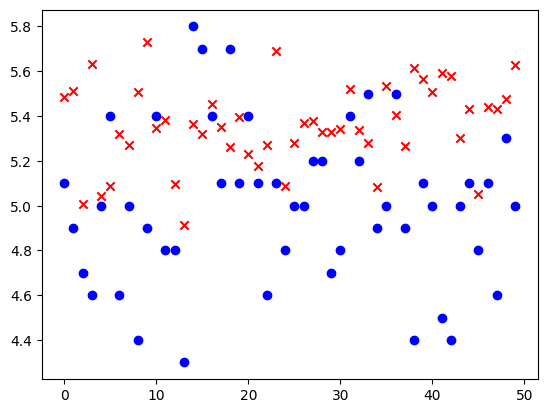

Epoch 6702/10000, Discriminator Loss: 1.3868225812911987, Generator Loss: 0.6947293281555176
Epoch 6703/10000, Discriminator Loss: 1.386837124824524, Generator Loss: 0.694745659828186
Epoch 6704/10000, Discriminator Loss: 1.3868162631988525, Generator Loss: 0.6947910189628601
Epoch 6705/10000, Discriminator Loss: 1.3867765665054321, Generator Loss: 0.6948575377464294
Epoch 6706/10000, Discriminator Loss: 1.3867886066436768, Generator Loss: 0.6948707699775696
Epoch 6707/10000, Discriminator Loss: 1.3867549896240234, Generator Loss: 0.6949291825294495
Epoch 6708/10000, Discriminator Loss: 1.386732816696167, Generator Loss: 0.6949725151062012
Epoch 6709/10000, Discriminator Loss: 1.3867835998535156, Generator Loss: 0.6949452757835388
Epoch 6710/10000, Discriminator Loss: 1.3867954015731812, Generator Loss: 0.694955050945282
Epoch 6711/10000, Discriminator Loss: 1.3866807222366333, Generator Loss: 0.695090651512146
Epoch 6712/10000, Discriminator Loss: 1.3866974115371704, Generator Loss: 0

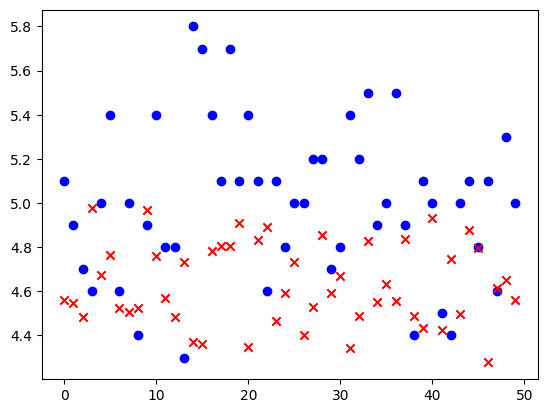

Epoch 6802/10000, Discriminator Loss: 1.3875582218170166, Generator Loss: 0.6921977996826172
Epoch 6803/10000, Discriminator Loss: 1.3875527381896973, Generator Loss: 0.6921381950378418
Epoch 6804/10000, Discriminator Loss: 1.3875389099121094, Generator Loss: 0.6920874118804932
Epoch 6805/10000, Discriminator Loss: 1.3875495195388794, Generator Loss: 0.6920149326324463
Epoch 6806/10000, Discriminator Loss: 1.3875482082366943, Generator Loss: 0.6919531226158142
Epoch 6807/10000, Discriminator Loss: 1.3875455856323242, Generator Loss: 0.6918920278549194
Epoch 6808/10000, Discriminator Loss: 1.3875222206115723, Generator Loss: 0.6918506622314453
Epoch 6809/10000, Discriminator Loss: 1.387521505355835, Generator Loss: 0.691788911819458
Epoch 6810/10000, Discriminator Loss: 1.387523889541626, Generator Loss: 0.6917253732681274
Epoch 6811/10000, Discriminator Loss: 1.387528419494629, Generator Loss: 0.6916549801826477
Epoch 6812/10000, Discriminator Loss: 1.3874925374984741, Generator Loss: 

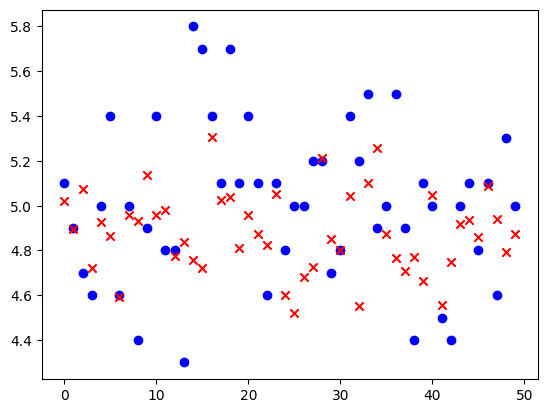

Epoch 6902/10000, Discriminator Loss: 1.386409044265747, Generator Loss: 0.6911724209785461
Epoch 6903/10000, Discriminator Loss: 1.3864951133728027, Generator Loss: 0.6911399960517883
Epoch 6904/10000, Discriminator Loss: 1.3865041732788086, Generator Loss: 0.6911846995353699
Epoch 6905/10000, Discriminator Loss: 1.3865785598754883, Generator Loss: 0.6911666393280029
Epoch 6906/10000, Discriminator Loss: 1.3866360187530518, Generator Loss: 0.6911672949790955
Epoch 6907/10000, Discriminator Loss: 1.386673927307129, Generator Loss: 0.6911899447441101
Epoch 6908/10000, Discriminator Loss: 1.386733055114746, Generator Loss: 0.6911939978599548
Epoch 6909/10000, Discriminator Loss: 1.386772871017456, Generator Loss: 0.6912184953689575
Epoch 6910/10000, Discriminator Loss: 1.3867454528808594, Generator Loss: 0.6913101673126221
Epoch 6911/10000, Discriminator Loss: 1.386803388595581, Generator Loss: 0.691318690776825
Epoch 6912/10000, Discriminator Loss: 1.3868383169174194, Generator Loss: 0.

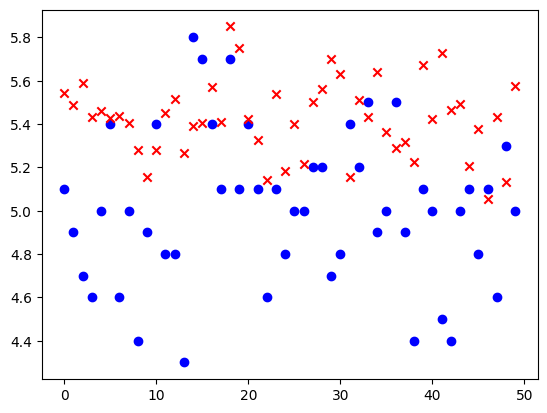

Epoch 7002/10000, Discriminator Loss: 1.3858745098114014, Generator Loss: 0.699973464012146
Epoch 7003/10000, Discriminator Loss: 1.3858988285064697, Generator Loss: 0.6999275088310242
Epoch 7004/10000, Discriminator Loss: 1.3859467506408691, Generator Loss: 0.6998531222343445
Epoch 7005/10000, Discriminator Loss: 1.385939121246338, Generator Loss: 0.6998292803764343
Epoch 7006/10000, Discriminator Loss: 1.3859541416168213, Generator Loss: 0.6997790336608887
Epoch 7007/10000, Discriminator Loss: 1.3859922885894775, Generator Loss: 0.6996985077857971
Epoch 7008/10000, Discriminator Loss: 1.3860957622528076, Generator Loss: 0.6995489001274109
Epoch 7009/10000, Discriminator Loss: 1.3860580921173096, Generator Loss: 0.699536144733429
Epoch 7010/10000, Discriminator Loss: 1.3860899209976196, Generator Loss: 0.6994492411613464
Epoch 7011/10000, Discriminator Loss: 1.386211633682251, Generator Loss: 0.6992651224136353
Epoch 7012/10000, Discriminator Loss: 1.386037826538086, Generator Loss: 0

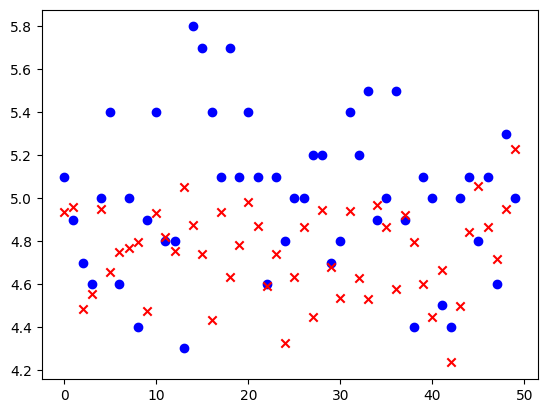

Epoch 7102/10000, Discriminator Loss: 1.3870846033096313, Generator Loss: 0.6898269653320312
Epoch 7103/10000, Discriminator Loss: 1.3869612216949463, Generator Loss: 0.6900424361228943
Epoch 7104/10000, Discriminator Loss: 1.3869214057922363, Generator Loss: 0.6901745796203613
Epoch 7105/10000, Discriminator Loss: 1.3869102001190186, Generator Loss: 0.6902765035629272
Epoch 7106/10000, Discriminator Loss: 1.386770486831665, Generator Loss: 0.6905016899108887
Epoch 7107/10000, Discriminator Loss: 1.3866640329360962, Generator Loss: 0.6906996369361877
Epoch 7108/10000, Discriminator Loss: 1.3866145610809326, Generator Loss: 0.6908359527587891
Epoch 7109/10000, Discriminator Loss: 1.386507511138916, Generator Loss: 0.6910282969474792
Epoch 7110/10000, Discriminator Loss: 1.3864952325820923, Generator Loss: 0.6911295056343079
Epoch 7111/10000, Discriminator Loss: 1.3863677978515625, Generator Loss: 0.6913386583328247
Epoch 7112/10000, Discriminator Loss: 1.3862593173980713, Generator Loss

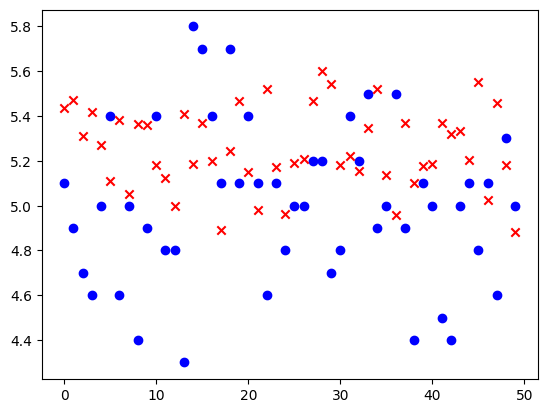

Epoch 7202/10000, Discriminator Loss: 1.387221336364746, Generator Loss: 0.6915165781974792
Epoch 7203/10000, Discriminator Loss: 1.3871886730194092, Generator Loss: 0.6916051506996155
Epoch 7204/10000, Discriminator Loss: 1.3872344493865967, Generator Loss: 0.6916193962097168
Epoch 7205/10000, Discriminator Loss: 1.387277603149414, Generator Loss: 0.6916389465332031
Epoch 7206/10000, Discriminator Loss: 1.3872824907302856, Generator Loss: 0.6916970014572144
Epoch 7207/10000, Discriminator Loss: 1.3873367309570312, Generator Loss: 0.6917067170143127
Epoch 7208/10000, Discriminator Loss: 1.3873116970062256, Generator Loss: 0.6917944550514221
Epoch 7209/10000, Discriminator Loss: 1.3873291015625, Generator Loss: 0.6918447017669678
Epoch 7210/10000, Discriminator Loss: 1.3873918056488037, Generator Loss: 0.6918506026268005
Epoch 7211/10000, Discriminator Loss: 1.3873581886291504, Generator Loss: 0.6919538378715515
Epoch 7212/10000, Discriminator Loss: 1.387371301651001, Generator Loss: 0.

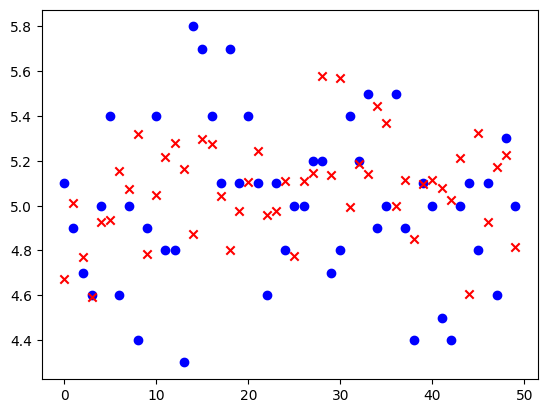

Epoch 7302/10000, Discriminator Loss: 1.3862210512161255, Generator Loss: 0.6977760195732117
Epoch 7303/10000, Discriminator Loss: 1.386242151260376, Generator Loss: 0.6977367997169495
Epoch 7304/10000, Discriminator Loss: 1.3862321376800537, Generator Loss: 0.6977271437644958
Epoch 7305/10000, Discriminator Loss: 1.3862743377685547, Generator Loss: 0.6976620554924011
Epoch 7306/10000, Discriminator Loss: 1.386335849761963, Generator Loss: 0.6975724697113037
Epoch 7307/10000, Discriminator Loss: 1.3862872123718262, Generator Loss: 0.6975934505462646
Epoch 7308/10000, Discriminator Loss: 1.3863427639007568, Generator Loss: 0.6975057125091553
Epoch 7309/10000, Discriminator Loss: 1.3863065242767334, Generator Loss: 0.697508692741394
Epoch 7310/10000, Discriminator Loss: 1.3863863945007324, Generator Loss: 0.6973915100097656
Epoch 7311/10000, Discriminator Loss: 1.3864423036575317, Generator Loss: 0.6972939968109131
Epoch 7312/10000, Discriminator Loss: 1.3863623142242432, Generator Loss:

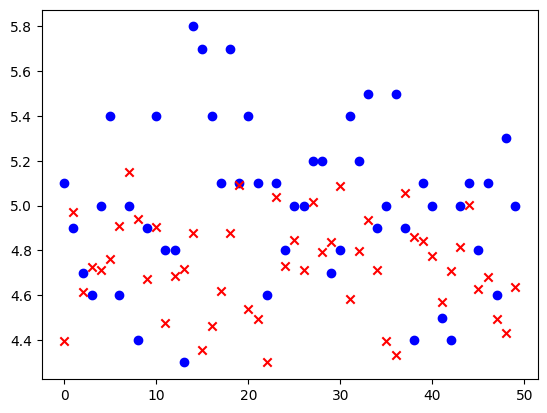

Epoch 7402/10000, Discriminator Loss: 1.3861924409866333, Generator Loss: 0.693744421005249
Epoch 7403/10000, Discriminator Loss: 1.3862974643707275, Generator Loss: 0.6936110854148865
Epoch 7404/10000, Discriminator Loss: 1.3863040208816528, Generator Loss: 0.6935704946517944
Epoch 7405/10000, Discriminator Loss: 1.3863708972930908, Generator Loss: 0.6934659481048584
Epoch 7406/10000, Discriminator Loss: 1.3864279985427856, Generator Loss: 0.6933645009994507
Epoch 7407/10000, Discriminator Loss: 1.3864035606384277, Generator Loss: 0.6933388710021973
Epoch 7408/10000, Discriminator Loss: 1.386496901512146, Generator Loss: 0.6931896209716797
Epoch 7409/10000, Discriminator Loss: 1.3864909410476685, Generator Loss: 0.6931360363960266
Epoch 7410/10000, Discriminator Loss: 1.3865398168563843, Generator Loss: 0.6930220127105713
Epoch 7411/10000, Discriminator Loss: 1.3865904808044434, Generator Loss: 0.6929017901420593
Epoch 7412/10000, Discriminator Loss: 1.3866136074066162, Generator Loss

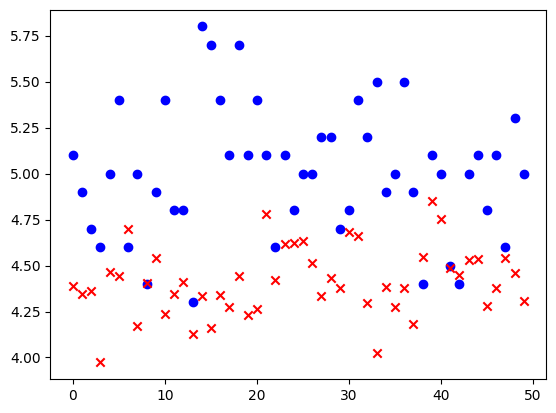

Epoch 7502/10000, Discriminator Loss: 1.387706995010376, Generator Loss: 0.6910651326179504
Epoch 7503/10000, Discriminator Loss: 1.3877007961273193, Generator Loss: 0.690919041633606
Epoch 7504/10000, Discriminator Loss: 1.3877191543579102, Generator Loss: 0.6907423138618469
Epoch 7505/10000, Discriminator Loss: 1.3877747058868408, Generator Loss: 0.6905343532562256
Epoch 7506/10000, Discriminator Loss: 1.3876787424087524, Generator Loss: 0.6904681921005249
Epoch 7507/10000, Discriminator Loss: 1.3877129554748535, Generator Loss: 0.6902772784233093
Epoch 7508/10000, Discriminator Loss: 1.3876386880874634, Generator Loss: 0.6901814937591553
Epoch 7509/10000, Discriminator Loss: 1.387556791305542, Generator Loss: 0.6900813579559326
Epoch 7510/10000, Discriminator Loss: 1.3876296281814575, Generator Loss: 0.6898462772369385
Epoch 7511/10000, Discriminator Loss: 1.387589931488037, Generator Loss: 0.6897056698799133
Epoch 7512/10000, Discriminator Loss: 1.387502908706665, Generator Loss: 0

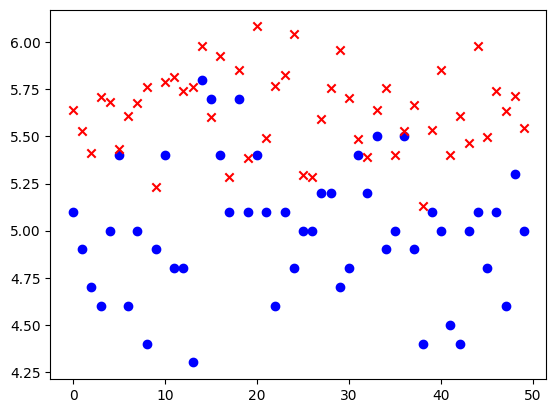

Epoch 7602/10000, Discriminator Loss: 1.3859127759933472, Generator Loss: 0.6919364333152771
Epoch 7603/10000, Discriminator Loss: 1.3857427835464478, Generator Loss: 0.6921789050102234
Epoch 7604/10000, Discriminator Loss: 1.3858883380889893, Generator Loss: 0.6920719742774963
Epoch 7605/10000, Discriminator Loss: 1.3858001232147217, Generator Loss: 0.6922555565834045
Epoch 7606/10000, Discriminator Loss: 1.3858888149261475, Generator Loss: 0.6922537088394165
Epoch 7607/10000, Discriminator Loss: 1.3857115507125854, Generator Loss: 0.6925497651100159
Epoch 7608/10000, Discriminator Loss: 1.3859636783599854, Generator Loss: 0.6923893690109253
Epoch 7609/10000, Discriminator Loss: 1.3861134052276611, Generator Loss: 0.6923361420631409
Epoch 7610/10000, Discriminator Loss: 1.3861095905303955, Generator Loss: 0.6924135684967041
Epoch 7611/10000, Discriminator Loss: 1.385887622833252, Generator Loss: 0.692747175693512
Epoch 7612/10000, Discriminator Loss: 1.3862627744674683, Generator Loss

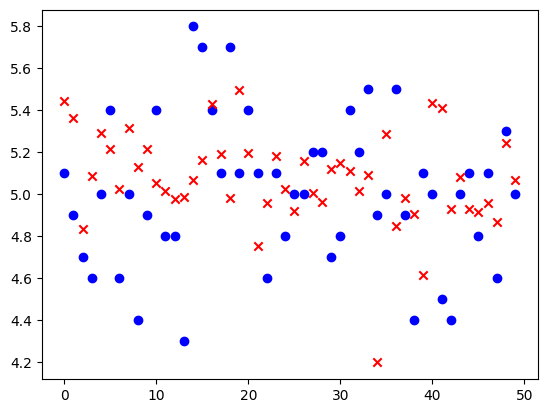

Epoch 7702/10000, Discriminator Loss: 1.387080192565918, Generator Loss: 0.6960557699203491
Epoch 7703/10000, Discriminator Loss: 1.387070894241333, Generator Loss: 0.6961347460746765
Epoch 7704/10000, Discriminator Loss: 1.3870952129364014, Generator Loss: 0.6961823105812073
Epoch 7705/10000, Discriminator Loss: 1.3870677947998047, Generator Loss: 0.6962756514549255
Epoch 7706/10000, Discriminator Loss: 1.3870391845703125, Generator Loss: 0.6963754296302795
Epoch 7707/10000, Discriminator Loss: 1.3870389461517334, Generator Loss: 0.6964384317398071
Epoch 7708/10000, Discriminator Loss: 1.3870184421539307, Generator Loss: 0.696519136428833
Epoch 7709/10000, Discriminator Loss: 1.3870069980621338, Generator Loss: 0.696590781211853
Epoch 7710/10000, Discriminator Loss: 1.386993169784546, Generator Loss: 0.6966593861579895
Epoch 7711/10000, Discriminator Loss: 1.3869822025299072, Generator Loss: 0.6967199444770813
Epoch 7712/10000, Discriminator Loss: 1.3869514465332031, Generator Loss: 0

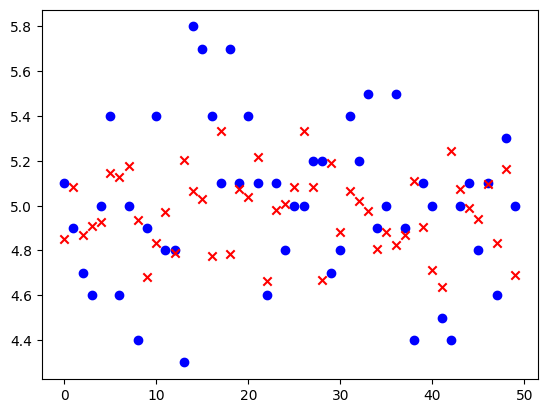

Epoch 7802/10000, Discriminator Loss: 1.3860414028167725, Generator Loss: 0.6923606991767883
Epoch 7803/10000, Discriminator Loss: 1.3860130310058594, Generator Loss: 0.6923590302467346
Epoch 7804/10000, Discriminator Loss: 1.3860063552856445, Generator Loss: 0.6923336982727051
Epoch 7805/10000, Discriminator Loss: 1.3860132694244385, Generator Loss: 0.6923089027404785
Epoch 7806/10000, Discriminator Loss: 1.3859950304031372, Generator Loss: 0.6923055052757263
Epoch 7807/10000, Discriminator Loss: 1.3860249519348145, Generator Loss: 0.6922541260719299
Epoch 7808/10000, Discriminator Loss: 1.3859858512878418, Generator Loss: 0.6922805309295654
Epoch 7809/10000, Discriminator Loss: 1.3859493732452393, Generator Loss: 0.6923059225082397
Epoch 7810/10000, Discriminator Loss: 1.3859539031982422, Generator Loss: 0.6922916173934937
Epoch 7811/10000, Discriminator Loss: 1.3859477043151855, Generator Loss: 0.6922882795333862
Epoch 7812/10000, Discriminator Loss: 1.3859074115753174, Generator Lo

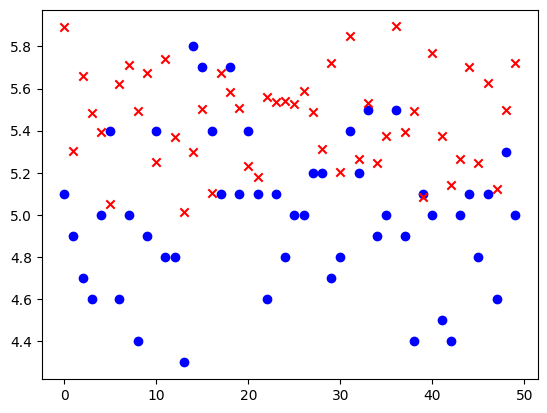

Epoch 7902/10000, Discriminator Loss: 1.387019395828247, Generator Loss: 0.6908754110336304
Epoch 7903/10000, Discriminator Loss: 1.3870000839233398, Generator Loss: 0.691005527973175
Epoch 7904/10000, Discriminator Loss: 1.3870062828063965, Generator Loss: 0.6911119818687439
Epoch 7905/10000, Discriminator Loss: 1.387070655822754, Generator Loss: 0.691165566444397
Epoch 7906/10000, Discriminator Loss: 1.3870275020599365, Generator Loss: 0.6913236975669861
Epoch 7907/10000, Discriminator Loss: 1.3870518207550049, Generator Loss: 0.6914187669754028
Epoch 7908/10000, Discriminator Loss: 1.3870351314544678, Generator Loss: 0.691551923751831
Epoch 7909/10000, Discriminator Loss: 1.3870022296905518, Generator Loss: 0.6917000412940979
Epoch 7910/10000, Discriminator Loss: 1.386955976486206, Generator Loss: 0.6918567419052124
Epoch 7911/10000, Discriminator Loss: 1.38698148727417, Generator Loss: 0.6919409036636353
Epoch 7912/10000, Discriminator Loss: 1.3870048522949219, Generator Loss: 0.69

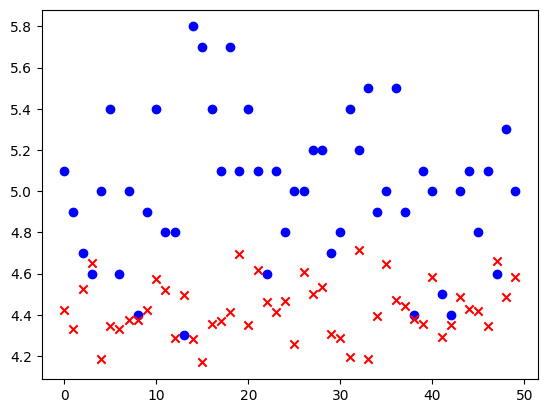

Epoch 8002/10000, Discriminator Loss: 1.3871691226959229, Generator Loss: 0.693950891494751
Epoch 8003/10000, Discriminator Loss: 1.3871228694915771, Generator Loss: 0.6937833428382874
Epoch 8004/10000, Discriminator Loss: 1.387078046798706, Generator Loss: 0.6936001777648926
Epoch 8005/10000, Discriminator Loss: 1.3869290351867676, Generator Loss: 0.6935244798660278
Epoch 8006/10000, Discriminator Loss: 1.3869426250457764, Generator Loss: 0.6932691335678101
Epoch 8007/10000, Discriminator Loss: 1.386946201324463, Generator Loss: 0.6930208802223206
Epoch 8008/10000, Discriminator Loss: 1.3868491649627686, Generator Loss: 0.692867636680603
Epoch 8009/10000, Discriminator Loss: 1.3868565559387207, Generator Loss: 0.6926137804985046
Epoch 8010/10000, Discriminator Loss: 1.3868544101715088, Generator Loss: 0.6923582553863525
Epoch 8011/10000, Discriminator Loss: 1.386676549911499, Generator Loss: 0.6922973394393921
Epoch 8012/10000, Discriminator Loss: 1.3865172863006592, Generator Loss: 0

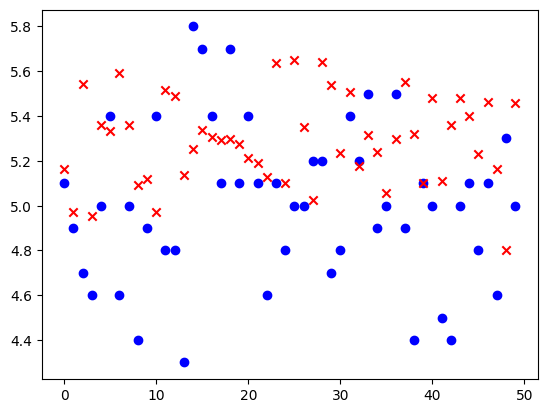

Epoch 8102/10000, Discriminator Loss: 1.3856794834136963, Generator Loss: 0.6972992420196533
Epoch 8103/10000, Discriminator Loss: 1.3856910467147827, Generator Loss: 0.6974461078643799
Epoch 8104/10000, Discriminator Loss: 1.3856728076934814, Generator Loss: 0.69762122631073
Epoch 8105/10000, Discriminator Loss: 1.3857063055038452, Generator Loss: 0.6977327466011047
Epoch 8106/10000, Discriminator Loss: 1.385664463043213, Generator Loss: 0.6979236006736755
Epoch 8107/10000, Discriminator Loss: 1.385716438293457, Generator Loss: 0.698005199432373
Epoch 8108/10000, Discriminator Loss: 1.3857144117355347, Generator Loss: 0.6981385946273804
Epoch 8109/10000, Discriminator Loss: 1.3857002258300781, Generator Loss: 0.6982794404029846
Epoch 8110/10000, Discriminator Loss: 1.385683536529541, Generator Loss: 0.6984182596206665
Epoch 8111/10000, Discriminator Loss: 1.3857189416885376, Generator Loss: 0.6984961628913879
Epoch 8112/10000, Discriminator Loss: 1.3857381343841553, Generator Loss: 0.

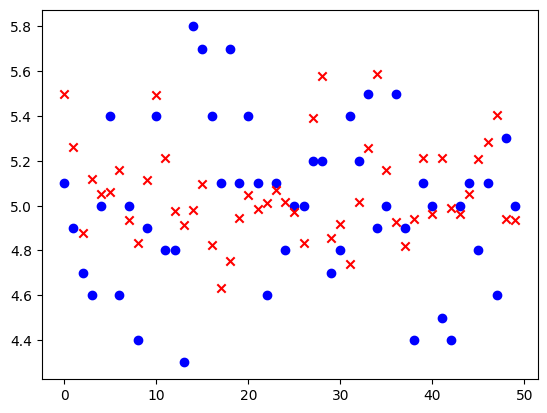

Epoch 8202/10000, Discriminator Loss: 1.3873586654663086, Generator Loss: 0.688591480255127
Epoch 8203/10000, Discriminator Loss: 1.3873915672302246, Generator Loss: 0.688591480255127
Epoch 8204/10000, Discriminator Loss: 1.3874130249023438, Generator Loss: 0.6886095404624939
Epoch 8205/10000, Discriminator Loss: 1.3874564170837402, Generator Loss: 0.6886136531829834
Epoch 8206/10000, Discriminator Loss: 1.3874189853668213, Generator Loss: 0.6887063384056091
Epoch 8207/10000, Discriminator Loss: 1.387465238571167, Generator Loss: 0.6887263655662537
Epoch 8208/10000, Discriminator Loss: 1.3874530792236328, Generator Loss: 0.6888089179992676
Epoch 8209/10000, Discriminator Loss: 1.387479543685913, Generator Loss: 0.688865602016449
Epoch 8210/10000, Discriminator Loss: 1.3873599767684937, Generator Loss: 0.6890681385993958
Epoch 8211/10000, Discriminator Loss: 1.3873649835586548, Generator Loss: 0.6891564130783081
Epoch 8212/10000, Discriminator Loss: 1.3873733282089233, Generator Loss: 0

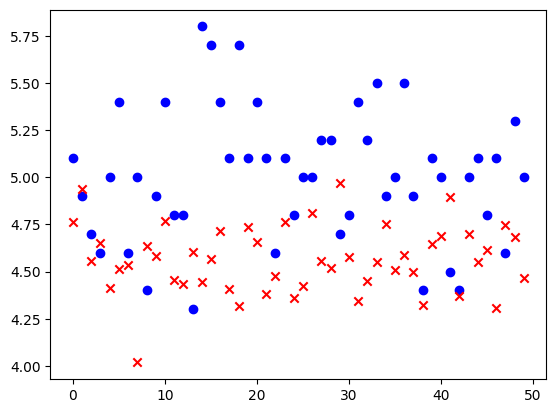

Epoch 8302/10000, Discriminator Loss: 1.388824701309204, Generator Loss: 0.6897065043449402
Epoch 8303/10000, Discriminator Loss: 1.3889336585998535, Generator Loss: 0.6894278526306152
Epoch 8304/10000, Discriminator Loss: 1.3889830112457275, Generator Loss: 0.6892135739326477
Epoch 8305/10000, Discriminator Loss: 1.3891246318817139, Generator Loss: 0.6889098882675171
Epoch 8306/10000, Discriminator Loss: 1.3891921043395996, Generator Loss: 0.6886872053146362
Epoch 8307/10000, Discriminator Loss: 1.3892858028411865, Generator Loss: 0.6884422302246094
Epoch 8308/10000, Discriminator Loss: 1.3893505334854126, Generator Loss: 0.6882315278053284
Epoch 8309/10000, Discriminator Loss: 1.3893978595733643, Generator Loss: 0.6880431175231934
Epoch 8310/10000, Discriminator Loss: 1.3893921375274658, Generator Loss: 0.6879188418388367
Epoch 8311/10000, Discriminator Loss: 1.3894120454788208, Generator Loss: 0.6877779364585876
Epoch 8312/10000, Discriminator Loss: 1.3893725872039795, Generator Los

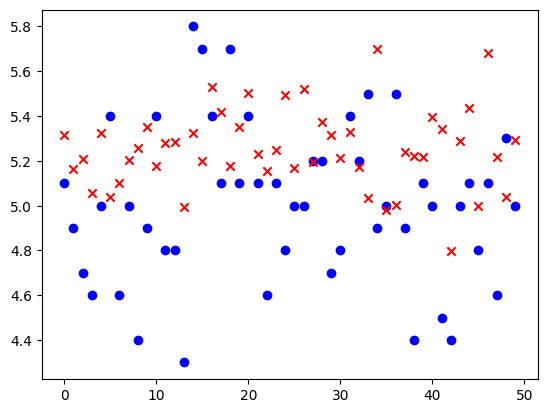

Epoch 8402/10000, Discriminator Loss: 1.3806209564208984, Generator Loss: 0.6916993856430054
Epoch 8403/10000, Discriminator Loss: 1.3809702396392822, Generator Loss: 0.6915684342384338
Epoch 8404/10000, Discriminator Loss: 1.3811569213867188, Generator Loss: 0.6916201114654541
Epoch 8405/10000, Discriminator Loss: 1.381399393081665, Generator Loss: 0.6916378736495972
Epoch 8406/10000, Discriminator Loss: 1.3816187381744385, Generator Loss: 0.6916861534118652
Epoch 8407/10000, Discriminator Loss: 1.3818012475967407, Generator Loss: 0.6917820572853088
Epoch 8408/10000, Discriminator Loss: 1.382126808166504, Generator Loss: 0.6917495727539062
Epoch 8409/10000, Discriminator Loss: 1.3821401596069336, Generator Loss: 0.6920138001441956
Epoch 8410/10000, Discriminator Loss: 1.3822050094604492, Generator Loss: 0.6922369599342346
Epoch 8411/10000, Discriminator Loss: 1.382075309753418, Generator Loss: 0.6926323175430298
Epoch 8412/10000, Discriminator Loss: 1.3819606304168701, Generator Loss:

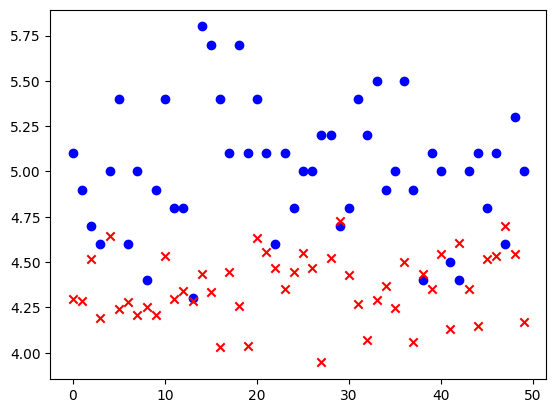

Epoch 8502/10000, Discriminator Loss: 1.4118969440460205, Generator Loss: 0.6718823909759521
Epoch 8503/10000, Discriminator Loss: 1.4127776622772217, Generator Loss: 0.6713612079620361
Epoch 8504/10000, Discriminator Loss: 1.4118664264678955, Generator Loss: 0.6726093888282776
Epoch 8505/10000, Discriminator Loss: 1.411141276359558, Generator Loss: 0.6734528541564941
Epoch 8506/10000, Discriminator Loss: 1.4086649417877197, Generator Loss: 0.6758695244789124
Epoch 8507/10000, Discriminator Loss: 1.4058341979980469, Generator Loss: 0.6784763336181641
Epoch 8508/10000, Discriminator Loss: 1.4035580158233643, Generator Loss: 0.6803393363952637
Epoch 8509/10000, Discriminator Loss: 1.401768445968628, Generator Loss: 0.6815128326416016
Epoch 8510/10000, Discriminator Loss: 1.3987489938735962, Generator Loss: 0.6836956739425659
Epoch 8511/10000, Discriminator Loss: 1.3964370489120483, Generator Loss: 0.685096263885498
Epoch 8512/10000, Discriminator Loss: 1.3945422172546387, Generator Loss:

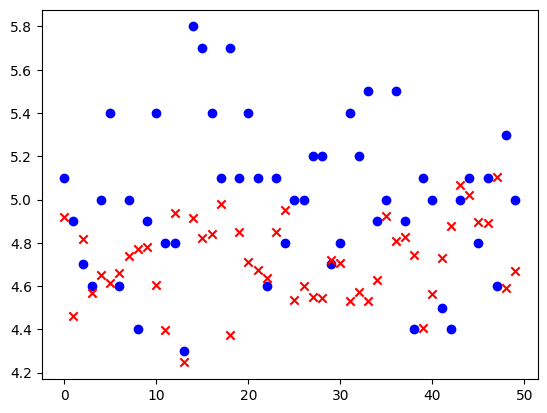

Epoch 8602/10000, Discriminator Loss: 1.3830044269561768, Generator Loss: 0.698975145816803
Epoch 8603/10000, Discriminator Loss: 1.3830089569091797, Generator Loss: 0.6988385915756226
Epoch 8604/10000, Discriminator Loss: 1.383133888244629, Generator Loss: 0.6986541748046875
Epoch 8605/10000, Discriminator Loss: 1.3831472396850586, Generator Loss: 0.698647677898407
Epoch 8606/10000, Discriminator Loss: 1.3833117485046387, Generator Loss: 0.6984493732452393
Epoch 8607/10000, Discriminator Loss: 1.3834736347198486, Generator Loss: 0.6982969641685486
Epoch 8608/10000, Discriminator Loss: 1.3839092254638672, Generator Loss: 0.6978137493133545
Epoch 8609/10000, Discriminator Loss: 1.3843907117843628, Generator Loss: 0.6973454356193542
Epoch 8610/10000, Discriminator Loss: 1.3848192691802979, Generator Loss: 0.6968992352485657
Epoch 8611/10000, Discriminator Loss: 1.3855048418045044, Generator Loss: 0.6962190270423889
Epoch 8612/10000, Discriminator Loss: 1.3861613273620605, Generator Loss:

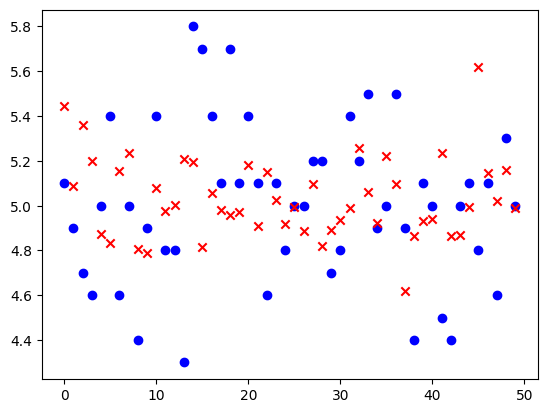

Epoch 8702/10000, Discriminator Loss: 1.3886808156967163, Generator Loss: 0.6883705258369446
Epoch 8703/10000, Discriminator Loss: 1.3889155387878418, Generator Loss: 0.6882063150405884
Epoch 8704/10000, Discriminator Loss: 1.388672113418579, Generator Loss: 0.6885116100311279
Epoch 8705/10000, Discriminator Loss: 1.3886373043060303, Generator Loss: 0.688605785369873
Epoch 8706/10000, Discriminator Loss: 1.3886618614196777, Generator Loss: 0.6886443495750427
Epoch 8707/10000, Discriminator Loss: 1.3886563777923584, Generator Loss: 0.6887174844741821
Epoch 8708/10000, Discriminator Loss: 1.3885550498962402, Generator Loss: 0.6888923645019531
Epoch 8709/10000, Discriminator Loss: 1.3884484767913818, Generator Loss: 0.6890708208084106
Epoch 8710/10000, Discriminator Loss: 1.3884570598602295, Generator Loss: 0.6891350746154785
Epoch 8711/10000, Discriminator Loss: 1.3885502815246582, Generator Loss: 0.6891162395477295
Epoch 8712/10000, Discriminator Loss: 1.3885691165924072, Generator Loss

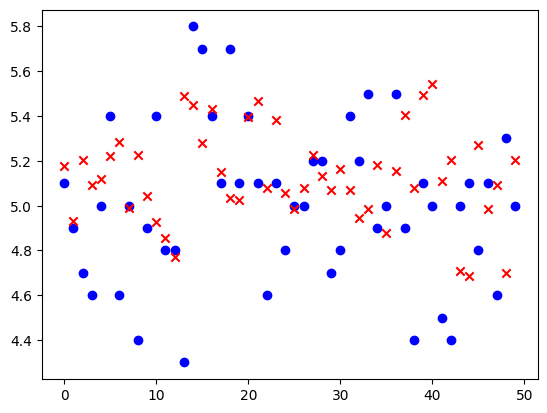

Epoch 8802/10000, Discriminator Loss: 1.3879480361938477, Generator Loss: 0.6929672956466675
Epoch 8803/10000, Discriminator Loss: 1.387995719909668, Generator Loss: 0.6929243206977844
Epoch 8804/10000, Discriminator Loss: 1.3879923820495605, Generator Loss: 0.6929256319999695
Epoch 8805/10000, Discriminator Loss: 1.3878166675567627, Generator Loss: 0.6930940747261047
Epoch 8806/10000, Discriminator Loss: 1.3878722190856934, Generator Loss: 0.6930267810821533
Epoch 8807/10000, Discriminator Loss: 1.387815237045288, Generator Loss: 0.6930694580078125
Epoch 8808/10000, Discriminator Loss: 1.3878744840621948, Generator Loss: 0.6929869651794434
Epoch 8809/10000, Discriminator Loss: 1.3878905773162842, Generator Loss: 0.6929481625556946
Epoch 8810/10000, Discriminator Loss: 1.387815237045288, Generator Loss: 0.6929941773414612
Epoch 8811/10000, Discriminator Loss: 1.387906551361084, Generator Loss: 0.6928669214248657
Epoch 8812/10000, Discriminator Loss: 1.387775182723999, Generator Loss: 0

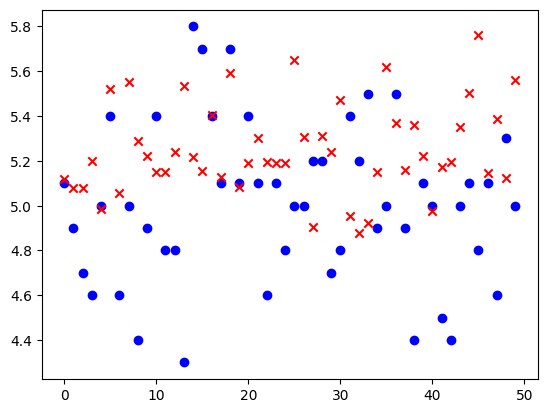

Epoch 8902/10000, Discriminator Loss: 1.387434482574463, Generator Loss: 0.6936580538749695
Epoch 8903/10000, Discriminator Loss: 1.387556791305542, Generator Loss: 0.693540096282959
Epoch 8904/10000, Discriminator Loss: 1.387455940246582, Generator Loss: 0.6936460137367249
Epoch 8905/10000, Discriminator Loss: 1.3875048160552979, Generator Loss: 0.6936042904853821
Epoch 8906/10000, Discriminator Loss: 1.387413740158081, Generator Loss: 0.6937007308006287
Epoch 8907/10000, Discriminator Loss: 1.3874270915985107, Generator Loss: 0.6936926245689392
Epoch 8908/10000, Discriminator Loss: 1.3874437808990479, Generator Loss: 0.6936826109886169
Epoch 8909/10000, Discriminator Loss: 1.3873701095581055, Generator Loss: 0.693757176399231
Epoch 8910/10000, Discriminator Loss: 1.3874485492706299, Generator Loss: 0.6936782598495483
Epoch 8911/10000, Discriminator Loss: 1.3873646259307861, Generator Loss: 0.6937620639801025
Epoch 8912/10000, Discriminator Loss: 1.3874163627624512, Generator Loss: 0.

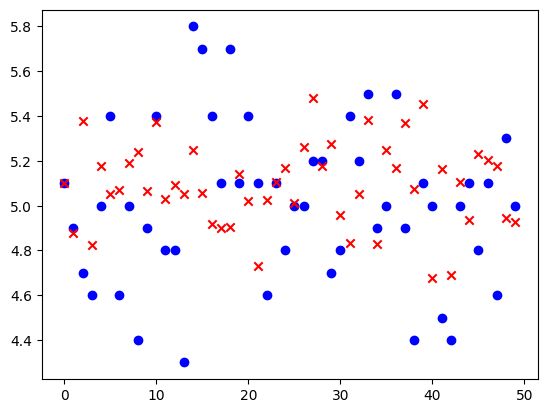

Epoch 9002/10000, Discriminator Loss: 1.386476993560791, Generator Loss: 0.6949729919433594
Epoch 9003/10000, Discriminator Loss: 1.386470079421997, Generator Loss: 0.6949838995933533
Epoch 9004/10000, Discriminator Loss: 1.3864474296569824, Generator Loss: 0.6950081586837769
Epoch 9005/10000, Discriminator Loss: 1.3864492177963257, Generator Loss: 0.6950090527534485
Epoch 9006/10000, Discriminator Loss: 1.3864357471466064, Generator Loss: 0.6950240135192871
Epoch 9007/10000, Discriminator Loss: 1.3864333629608154, Generator Loss: 0.695029079914093
Epoch 9008/10000, Discriminator Loss: 1.3864092826843262, Generator Loss: 0.6950507164001465
Epoch 9009/10000, Discriminator Loss: 1.3864049911499023, Generator Loss: 0.6950536966323853
Epoch 9010/10000, Discriminator Loss: 1.3864009380340576, Generator Loss: 0.6950570940971375
Epoch 9011/10000, Discriminator Loss: 1.3863904476165771, Generator Loss: 0.695065438747406
Epoch 9012/10000, Discriminator Loss: 1.3863818645477295, Generator Loss: 

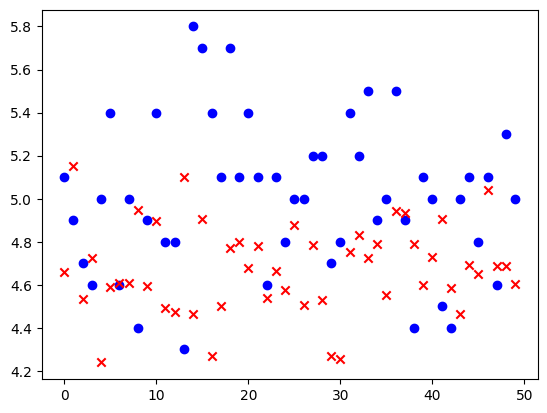

Epoch 9102/10000, Discriminator Loss: 1.3861024379730225, Generator Loss: 0.6915826201438904
Epoch 9103/10000, Discriminator Loss: 1.3863000869750977, Generator Loss: 0.6913462281227112
Epoch 9104/10000, Discriminator Loss: 1.38627290725708, Generator Loss: 0.691326379776001
Epoch 9105/10000, Discriminator Loss: 1.386580467224121, Generator Loss: 0.6910465359687805
Epoch 9106/10000, Discriminator Loss: 1.3864021301269531, Generator Loss: 0.6912493705749512
Epoch 9107/10000, Discriminator Loss: 1.3865175247192383, Generator Loss: 0.6911225914955139
Epoch 9108/10000, Discriminator Loss: 1.3867868185043335, Generator Loss: 0.6908435821533203
Epoch 9109/10000, Discriminator Loss: 1.3867871761322021, Generator Loss: 0.6908831000328064
Epoch 9110/10000, Discriminator Loss: 1.3869198560714722, Generator Loss: 0.6908182501792908
Epoch 9111/10000, Discriminator Loss: 1.3871253728866577, Generator Loss: 0.6906054019927979
Epoch 9112/10000, Discriminator Loss: 1.3869577646255493, Generator Loss: 

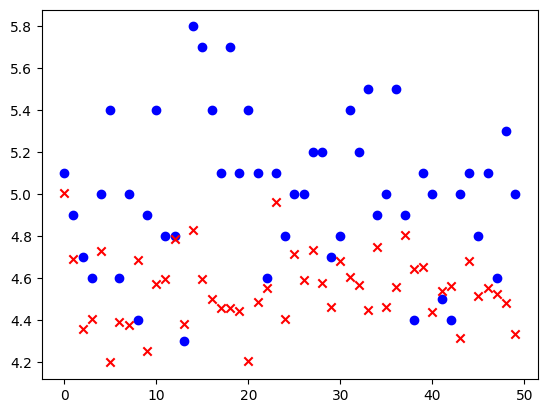

Epoch 9202/10000, Discriminator Loss: 1.3864563703536987, Generator Loss: 0.6906021237373352
Epoch 9203/10000, Discriminator Loss: 1.3864545822143555, Generator Loss: 0.6905629634857178
Epoch 9204/10000, Discriminator Loss: 1.3864890336990356, Generator Loss: 0.6904899477958679
Epoch 9205/10000, Discriminator Loss: 1.38643217086792, Generator Loss: 0.6905114650726318
Epoch 9206/10000, Discriminator Loss: 1.3864288330078125, Generator Loss: 0.6904801726341248
Epoch 9207/10000, Discriminator Loss: 1.386449933052063, Generator Loss: 0.6904260516166687
Epoch 9208/10000, Discriminator Loss: 1.3864718675613403, Generator Loss: 0.6903730630874634
Epoch 9209/10000, Discriminator Loss: 1.3865106105804443, Generator Loss: 0.6903061866760254
Epoch 9210/10000, Discriminator Loss: 1.3864597082138062, Generator Loss: 0.6903313398361206
Epoch 9211/10000, Discriminator Loss: 1.3864182233810425, Generator Loss: 0.6903481483459473
Epoch 9212/10000, Discriminator Loss: 1.3864631652832031, Generator Loss:

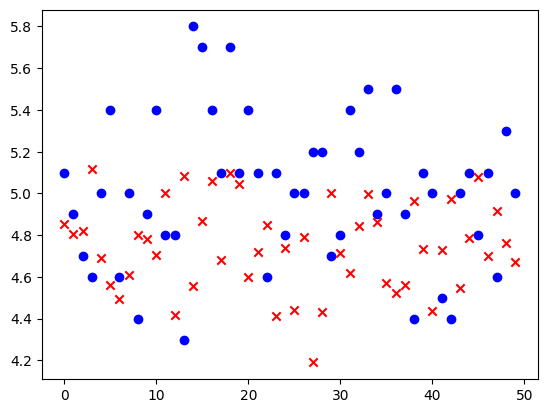

Epoch 9302/10000, Discriminator Loss: 1.3877906799316406, Generator Loss: 0.6908273100852966
Epoch 9303/10000, Discriminator Loss: 1.3877348899841309, Generator Loss: 0.6909742951393127
Epoch 9304/10000, Discriminator Loss: 1.3876420259475708, Generator Loss: 0.6911519765853882
Epoch 9305/10000, Discriminator Loss: 1.3875895738601685, Generator Loss: 0.6912989616394043
Epoch 9306/10000, Discriminator Loss: 1.3874642848968506, Generator Loss: 0.6915275454521179
Epoch 9307/10000, Discriminator Loss: 1.3874032497406006, Generator Loss: 0.6917022466659546
Epoch 9308/10000, Discriminator Loss: 1.3872489929199219, Generator Loss: 0.6919609904289246
Epoch 9309/10000, Discriminator Loss: 1.3871090412139893, Generator Loss: 0.6922098398208618
Epoch 9310/10000, Discriminator Loss: 1.3870720863342285, Generator Loss: 0.6923710107803345
Epoch 9311/10000, Discriminator Loss: 1.3869414329528809, Generator Loss: 0.6926283240318298
Epoch 9312/10000, Discriminator Loss: 1.3869516849517822, Generator Lo

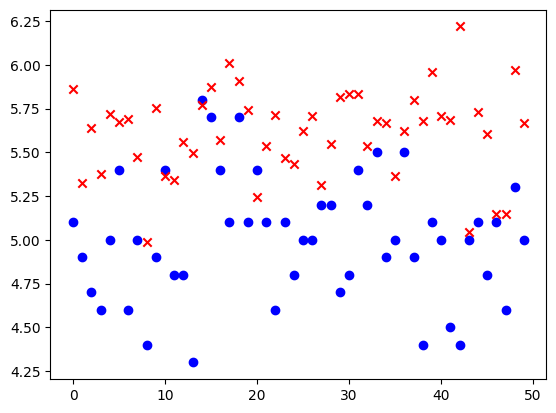

Epoch 9402/10000, Discriminator Loss: 1.385887861251831, Generator Loss: 0.6983128190040588
Epoch 9403/10000, Discriminator Loss: 1.3862037658691406, Generator Loss: 0.6978977918624878
Epoch 9404/10000, Discriminator Loss: 1.385922908782959, Generator Loss: 0.6981217861175537
Epoch 9405/10000, Discriminator Loss: 1.3859351873397827, Generator Loss: 0.698032021522522
Epoch 9406/10000, Discriminator Loss: 1.385994553565979, Generator Loss: 0.6978793144226074
Epoch 9407/10000, Discriminator Loss: 1.3857834339141846, Generator Loss: 0.6980275511741638
Epoch 9408/10000, Discriminator Loss: 1.385861873626709, Generator Loss: 0.6978553533554077
Epoch 9409/10000, Discriminator Loss: 1.3858251571655273, Generator Loss: 0.6978121995925903
Epoch 9410/10000, Discriminator Loss: 1.38583242893219, Generator Loss: 0.6976768970489502
Epoch 9411/10000, Discriminator Loss: 1.3857179880142212, Generator Loss: 0.6976974606513977
Epoch 9412/10000, Discriminator Loss: 1.3858273029327393, Generator Loss: 0.6

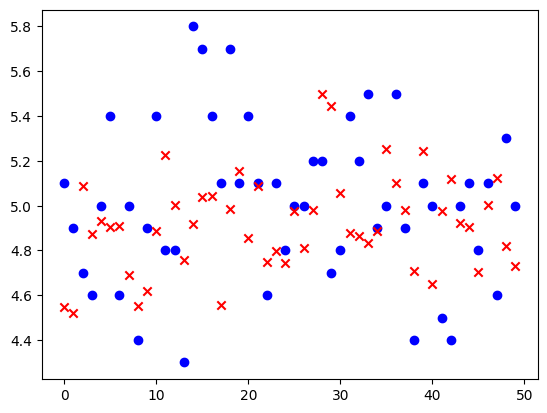

Epoch 9502/10000, Discriminator Loss: 1.3860187530517578, Generator Loss: 0.6926344037055969
Epoch 9503/10000, Discriminator Loss: 1.3860490322113037, Generator Loss: 0.6925787329673767
Epoch 9504/10000, Discriminator Loss: 1.3860955238342285, Generator Loss: 0.6925102472305298
Epoch 9505/10000, Discriminator Loss: 1.3860889673233032, Generator Loss: 0.692497193813324
Epoch 9506/10000, Discriminator Loss: 1.3860535621643066, Generator Loss: 0.6925143599510193
Epoch 9507/10000, Discriminator Loss: 1.3861186504364014, Generator Loss: 0.6924339532852173
Epoch 9508/10000, Discriminator Loss: 1.3860998153686523, Generator Loss: 0.6924397945404053
Epoch 9509/10000, Discriminator Loss: 1.3861207962036133, Generator Loss: 0.6924079656600952
Epoch 9510/10000, Discriminator Loss: 1.3861185312271118, Generator Loss: 0.6924011707305908
Epoch 9511/10000, Discriminator Loss: 1.386138677597046, Generator Loss: 0.692374587059021
Epoch 9512/10000, Discriminator Loss: 1.3861658573150635, Generator Loss:

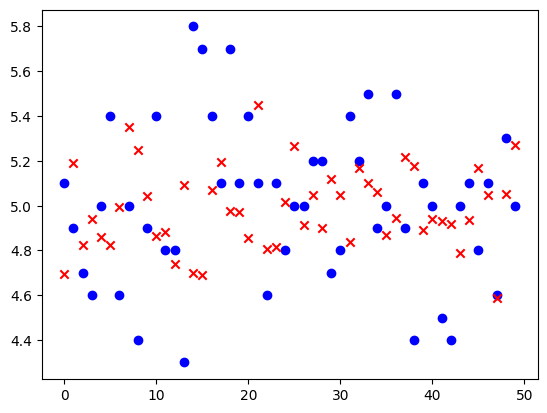

Epoch 9602/10000, Discriminator Loss: 1.3874602317810059, Generator Loss: 0.6944239139556885
Epoch 9603/10000, Discriminator Loss: 1.387521505355835, Generator Loss: 0.6944114565849304
Epoch 9604/10000, Discriminator Loss: 1.3874926567077637, Generator Loss: 0.6944853067398071
Epoch 9605/10000, Discriminator Loss: 1.3876194953918457, Generator Loss: 0.6943967342376709
Epoch 9606/10000, Discriminator Loss: 1.3876407146453857, Generator Loss: 0.6944083571434021
Epoch 9607/10000, Discriminator Loss: 1.387733817100525, Generator Loss: 0.6943421363830566
Epoch 9608/10000, Discriminator Loss: 1.3875634670257568, Generator Loss: 0.6945289373397827
Epoch 9609/10000, Discriminator Loss: 1.387803554534912, Generator Loss: 0.6942989826202393
Epoch 9610/10000, Discriminator Loss: 1.3875812292099, Generator Loss: 0.6945180296897888
Epoch 9611/10000, Discriminator Loss: 1.3875072002410889, Generator Loss: 0.6945831179618835
Epoch 9612/10000, Discriminator Loss: 1.387742042541504, Generator Loss: 0.6

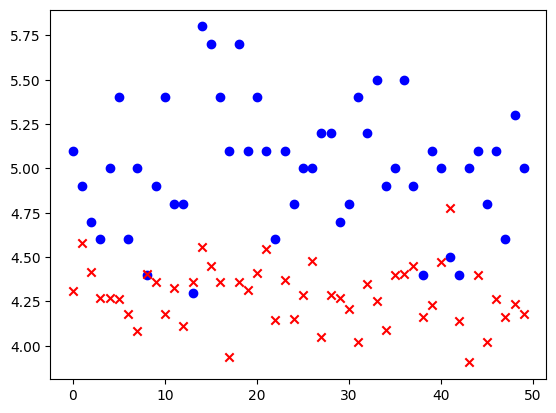

Epoch 9702/10000, Discriminator Loss: 1.3853529691696167, Generator Loss: 0.690986692905426
Epoch 9703/10000, Discriminator Loss: 1.3852410316467285, Generator Loss: 0.6909471750259399
Epoch 9704/10000, Discriminator Loss: 1.3851416110992432, Generator Loss: 0.6909015774726868
Epoch 9705/10000, Discriminator Loss: 1.3852179050445557, Generator Loss: 0.6906754374504089
Epoch 9706/10000, Discriminator Loss: 1.385189175605774, Generator Loss: 0.6905575394630432
Epoch 9707/10000, Discriminator Loss: 1.3852558135986328, Generator Loss: 0.690346896648407
Epoch 9708/10000, Discriminator Loss: 1.3852314949035645, Generator Loss: 0.6902328729629517
Epoch 9709/10000, Discriminator Loss: 1.385183334350586, Generator Loss: 0.6901452541351318
Epoch 9710/10000, Discriminator Loss: 1.385303258895874, Generator Loss: 0.6898884773254395
Epoch 9711/10000, Discriminator Loss: 1.3853263854980469, Generator Loss: 0.6897430419921875
Epoch 9712/10000, Discriminator Loss: 1.3851819038391113, Generator Loss: 0

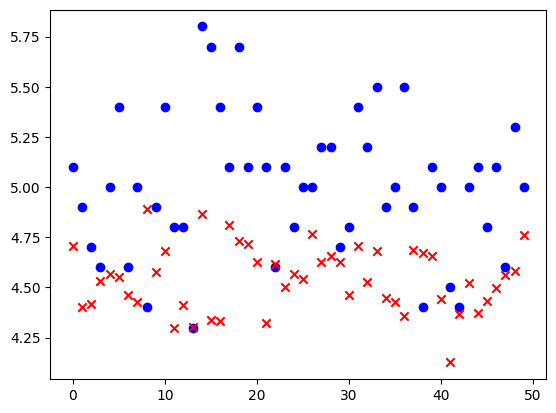

Epoch 9802/10000, Discriminator Loss: 1.387316107749939, Generator Loss: 0.6901098489761353
Epoch 9803/10000, Discriminator Loss: 1.3873637914657593, Generator Loss: 0.6900166273117065
Epoch 9804/10000, Discriminator Loss: 1.3873317241668701, Generator Loss: 0.690163254737854
Epoch 9805/10000, Discriminator Loss: 1.3872063159942627, Generator Loss: 0.6901013255119324
Epoch 9806/10000, Discriminator Loss: 1.3867738246917725, Generator Loss: 0.6907626390457153
Epoch 9807/10000, Discriminator Loss: 1.386965274810791, Generator Loss: 0.6906028985977173
Epoch 9808/10000, Discriminator Loss: 1.3864400386810303, Generator Loss: 0.6913394331932068
Epoch 9809/10000, Discriminator Loss: 1.3866784572601318, Generator Loss: 0.6911661624908447
Epoch 9810/10000, Discriminator Loss: 1.386683702468872, Generator Loss: 0.6914427876472473
Epoch 9811/10000, Discriminator Loss: 1.3866677284240723, Generator Loss: 0.6915729641914368
Epoch 9812/10000, Discriminator Loss: 1.3868494033813477, Generator Loss: 

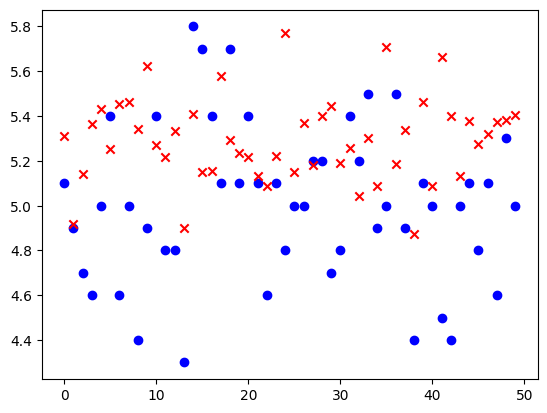

Epoch 9902/10000, Discriminator Loss: 1.3858376741409302, Generator Loss: 0.6922463178634644
Epoch 9903/10000, Discriminator Loss: 1.3859388828277588, Generator Loss: 0.6921459436416626
Epoch 9904/10000, Discriminator Loss: 1.3858586549758911, Generator Loss: 0.6922440528869629
Epoch 9905/10000, Discriminator Loss: 1.3862073421478271, Generator Loss: 0.6919264793395996
Epoch 9906/10000, Discriminator Loss: 1.3862433433532715, Generator Loss: 0.6919349431991577
Epoch 9907/10000, Discriminator Loss: 1.38640558719635, Generator Loss: 0.6918264031410217
Epoch 9908/10000, Discriminator Loss: 1.3865642547607422, Generator Loss: 0.691720187664032
Epoch 9909/10000, Discriminator Loss: 1.3863879442214966, Generator Loss: 0.6919479370117188
Epoch 9910/10000, Discriminator Loss: 1.386751651763916, Generator Loss: 0.6916273236274719
Epoch 9911/10000, Discriminator Loss: 1.3867747783660889, Generator Loss: 0.6916519403457642
Epoch 9912/10000, Discriminator Loss: 1.3871080875396729, Generator Loss: 

In [29]:
num_epochs = 10000
for i in range(num_epochs):

  dis_optim.zero_grad()
  real_outputs = discriminator(torch.from_numpy(X_train_numpy).float())
  real_loss = loss(real_outputs, truth_labels.unsqueeze(1))

  random_data = torch.rand(X_train.shape[0], z_dim)
  fake_data = generator(random_data)
  fake_outputs = discriminator(fake_data)
  fake_loss = loss(fake_outputs, fake_labels.unsqueeze(1))

  total_loss = real_loss + fake_loss
  total_loss.backward()
  dis_optim.step()

  gen_optim.zero_grad()

  fake_data = generator(random_data)
  fake_outputs = discriminator(fake_data)
  gen_loss = loss(fake_outputs, truth_labels.unsqueeze(1))

  gen_loss.backward()
  gen_optim.step()
  wandb.log({'disc_loss':total_loss,'gen_loss':gen_loss})
  print(f"Epoch {i+1}/{num_epochs}, Discriminator Loss: {total_loss.item()}, Generator Loss: {gen_loss.item()}")
  if i%100==0:
    plt.scatter(np.arange(0,iris_0.shape[0]),iris_0['sepal length (cm)'],c='blue')
    plt.scatter(np.arange(0,fake_data.shape[0]),fake_data.detach().numpy()[:,0],c='r', marker='x')
    plt.show()


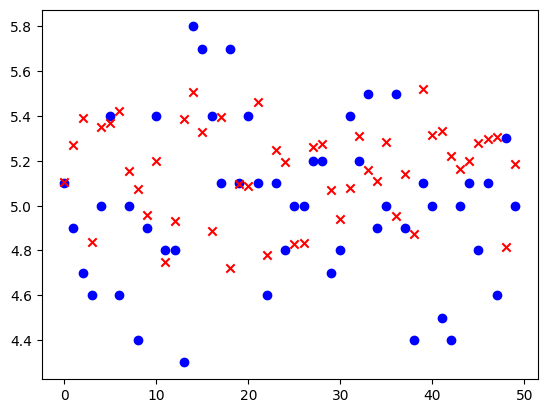

In [30]:
plt.scatter(np.arange(0,iris_0.shape[0]),iris_0['sepal length (cm)'],c='blue')
plt.scatter(np.arange(0,fake_data.shape[0]),fake_data.detach().numpy()[:,0],c='r', marker='x')
plt.show()

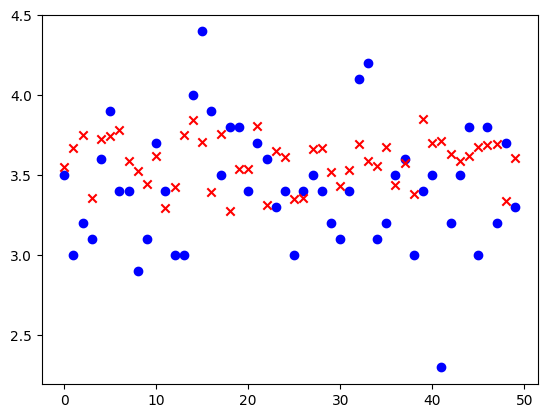

In [32]:
plt.scatter(np.arange(0,iris_0.shape[0]),iris_0['sepal width (cm)'],c='blue')
plt.scatter(np.arange(0,fake_data.shape[0]),fake_data.detach().numpy()[:,1],c='r', marker='x')
plt.show()

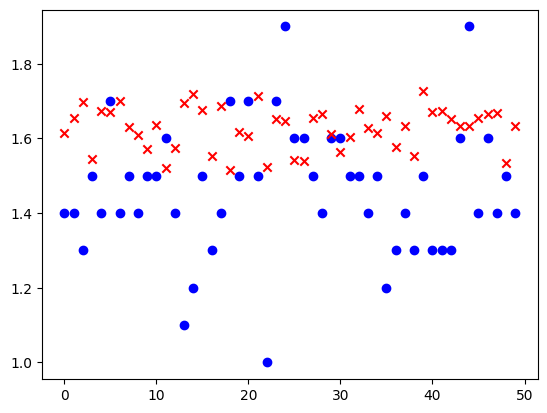

In [33]:
plt.scatter(np.arange(0,iris_0.shape[0]),iris_0['petal length (cm)'],c='blue')
plt.scatter(np.arange(0,fake_data.shape[0]),fake_data.detach().numpy()[:,2],c='r', marker='x')
plt.show()

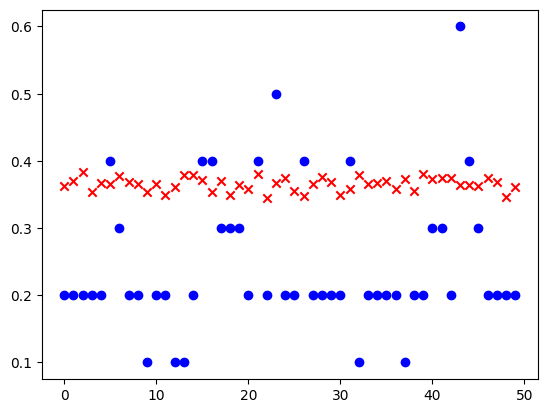

In [34]:
plt.scatter(np.arange(0,iris_0.shape[0]),iris_0['petal width (cm)'],c='blue')
plt.scatter(np.arange(0,fake_data.shape[0]),fake_data.detach().numpy()[:,3],c='r', marker='x')
plt.show()

In [37]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [38]:
fake_data

tensor([[5.1050, 3.5526, 1.6135, 0.3629],
        [5.2705, 3.6729, 1.6559, 0.3701],
        [5.3898, 3.7542, 1.6985, 0.3831],
        [4.8362, 3.3581, 1.5445, 0.3539],
        [5.3498, 3.7297, 1.6736, 0.3675],
        [5.3682, 3.7471, 1.6721, 0.3660],
        [5.4242, 3.7815, 1.7004, 0.3780],
        [5.1550, 3.5879, 1.6297, 0.3683],
        [5.0737, 3.5294, 1.6086, 0.3659],
        [4.9576, 3.4470, 1.5720, 0.3541],
        [5.2005, 3.6223, 1.6365, 0.3652],
        [4.7508, 3.2960, 1.5218, 0.3492],
        [4.9332, 3.4254, 1.5758, 0.3617],
        [5.3873, 3.7520, 1.6957, 0.3788],
        [5.5094, 3.8438, 1.7204, 0.3794],
        [5.3280, 3.7104, 1.6759, 0.3718],
        [4.8851, 3.3967, 1.5521, 0.3542],
        [5.3946, 3.7619, 1.6867, 0.3706],
        [4.7215, 3.2749, 1.5145, 0.3487],
        [5.0959, 3.5413, 1.6183, 0.3648],
        [5.0890, 3.5405, 1.6067, 0.3576],
        [5.4642, 3.8096, 1.7129, 0.3812],
        [4.7781, 3.3179, 1.5226, 0.3445],
        [5.2474, 3.6532, 1.6528, 0